# Brunner-Munzel検定について

* 黒木玄
* 2022-08-05

__文献__

* E. Brunner and U. Munzel. The nonparametric Behrens-Fisher problem: Asymptotic theory and a small-sample
approximation. Biometrical Journal, 42:17–25, 2000.
\[[pdf](https://www.researchgate.net/profile/Edgar-Brunner/publication/264799502_Nonparametric_Hypotheses_and_Rank_Statistics_for_Unbalanced_Factorial_Designs/links/5756a00408ae155a87bc5c8c/Nonparametric-Hypotheses-and-Rank-Statistics-for-Unbalanced-Factorial-Designs.pdf)\]

* Karin Neubert and Edgar Brunner, A studentized permutation test for the non-parametric Behrens-Fisher problem, Computational Statistics and Data Analysis, Vol. 51, pp. 5192-5204 (2007).
https://doi.org/10.1016/j.csda.2006.05.024

* Claus P. Nowak, Markus Pauly, Edgar Brunner. The nonparametric Behrens-Fisher problem in small samples.
https://arxiv.org/abs/2208.01231

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#準備" data-toc-modified-id="準備-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>準備</a></span><ul class="toc-item"><li><span><a href="#パッケージの読み込みなど" data-toc-modified-id="パッケージの読み込みなど-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>パッケージの読み込みなど</a></span></li><li><span><a href="#組み合わせの生成子" data-toc-modified-id="組み合わせの生成子-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>組み合わせの生成子</a></span></li><li><span><a href="#Welchのt検定" data-toc-modified-id="Welchのt検定-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Welchのt検定</a></span></li><li><span><a href="#単峰型の函数が正の値になる場所を見つける函数" data-toc-modified-id="単峰型の函数が正の値になる場所を見つける函数-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>単峰型の函数が正の値になる場所を見つける函数</a></span></li><li><span><a href="#2つの分布が「互角」になるシフトの仕方を求める函数" data-toc-modified-id="2つの分布が「互角」になるシフトの仕方を求める函数-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>2つの分布が「互角」になるシフトの仕方を求める函数</a></span></li></ul></li><li><span><a href="#Brunner-Munzel検定" data-toc-modified-id="Brunner-Munzel検定-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Brunner-Munzel検定</a></span><ul class="toc-item"><li><span><a href="#Brunner-Munzel検定の実装" data-toc-modified-id="Brunner-Munzel検定の実装-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Brunner-Munzel検定の実装</a></span></li><li><span><a href="#よく使われているっぽいテストデータで正しく実装されているかを確認" data-toc-modified-id="よく使われているっぽいテストデータで正しく実装されているかを確認-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>よく使われているっぽいテストデータで正しく実装されているかを確認</a></span></li><li><span><a href="#組み合わせの生成子" data-toc-modified-id="組み合わせの生成子-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>組み合わせの生成子</a></span></li><li><span><a href="#Brunner-Munzel検定のpermutation版の実装" data-toc-modified-id="Brunner-Munzel検定のpermutation版の実装-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Brunner-Munzel検定のpermutation版の実装</a></span></li><li><span><a href="#permutation版が正しく実装されているかの確認" data-toc-modified-id="permutation版が正しく実装されているかの確認-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>permutation版が正しく実装されているかの確認</a></span></li></ul></li><li><span><a href="#計算例" data-toc-modified-id="計算例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>計算例</a></span></li><li><span><a href="#Brunner-Munzel検定とWelchのt検定の比較" data-toc-modified-id="Brunner-Munzel検定とWelchのt検定の比較-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Brunner-Munzel検定とWelchのt検定の比較</a></span><ul class="toc-item"><li><span><a href="#第一種の過誤の確率" data-toc-modified-id="第一種の過誤の確率-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>第一種の過誤の確率</a></span></li><li><span><a href="#Brunner-Munzel検定は中央値に関する検定ではないことの証拠" data-toc-modified-id="Brunner-Munzel検定は中央値に関する検定ではないことの証拠-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Brunner-Munzel検定は中央値に関する検定ではないことの証拠</a></span></li><li><span><a href="#BM検定による互角シフトの信頼区間とWelchのt検定による平均の差の信頼区間の比較" data-toc-modified-id="BM検定による互角シフトの信頼区間とWelchのt検定による平均の差の信頼区間の比較-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>BM検定による互角シフトの信頼区間とWelchのt検定による平均の差の信頼区間の比較</a></span></li></ul></li><li><span><a href="#小サンプルでのpermutation版の検定とBM検定とWelchのt検定の比較" data-toc-modified-id="小サンプルでのpermutation版の検定とBM検定とWelchのt検定の比較-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>小サンプルでのpermutation版の検定とBM検定とWelchのt検定の比較</a></span></li></ul></div>

## 準備

### パッケージの読み込みなど

In [1]:
using Base.Threads
using BenchmarkTools
using Distributions
using PrettyPrinting
using QuadGK
using Random
using RCall
using Roots
using StatsBase
using StatsFuns
using StatsPlots
default(fmt=:png, size=(400, 250),
    titlefontsize=10, guidefontsize=8, tickfontsize=6)

x ⪅ y = x < y || x ≈ y
x ⪆ y = x > y || x ≈ y
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

safediv (generic function with 1 method)

### 組み合わせの生成子

In [2]:
"""
    nextcombination!(n, t, c = typeof(t)[min(t-1, i) for i in 1:t])

`[1,2,…,n]` からの重複無しの `t` 個の組み合わせ `c` をすべて生成したい.

`nextcombination!(n, t, c)` は配列で表現された組み合わせ `c` をその次の組み合わせに書き換えて, `c` を返す.

初期条件を `c = typeof(t)[min(t-1, i) for i in 1:t]` にすると, `binomial(n, t)` 回の `nextcombination!(n, t, c)` ですべての組み合わせが生成される.
"""
function nextcombination!(n, t, c = typeof(t)[min(t-1, i) for i in 1:t])
    t == 0 && return c
    @inbounds for i in t:-1:1
        c[i] += 1
        c[i] > (n - (t - i)) && continue
        for j in i+1:t
            c[j] = c[j-1] + 1
        end
        break
    end
    c
end

"""
    mycombinations!(n::Integer, t, c)

事前に割り当てられた組み合わせを格納する配列 `c` を使って, `[1,2,…,n]` からの重複無しの `t` 個の組み合わせのすべてを生成する生成子を返す.
"""
function mycombinations!(n::Integer, t, c)
    for i in 1:t c[i] = min(t - 1, i) end
    (nextcombination!(n, t, c) for _ in 1:binomial(n, t))
end

"""
    mycombinations!(a, t, c)

事前に割り当てられた組み合わせを格納する配列 `c` を使って, 配列 `a` からのインデックスに重複がない `t` 個の組み合わせのすべてを生成する生成子を返す.
"""
function mycombinations!(a, t, c)
    t < 0 && (t = length(a) + 1)
    (view(a, indices) for indices in mycombinations!(length(a), t, c))
end

"""
    mycombinations(x, t)

`x` が整数ならば `[1,2,…,x]` からの, `x` が配列ならば `x` からのインデックスに重複がない `t` 個の組み合わせのすべてを生成する生成子を返す.
"""
mycombinations(x, t) = mycombinations!(x, t, Vector{typeof(t)}(undef, t))

mycombinations

### Welchのt検定

In [3]:
function tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    (x̄ - ȳ - Δμ) / √(sx²/m + sy²/n)
end

function tvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function degree_of_freedom_welch(m, sx², n, sy²)
    (sx²/m + sy²/n)^2 / ((sx²/m)^2/(m-1) + (sy²/n)^2/(n-1))
end

function degree_of_freedom_welch(x, y)
    m, sx² = length(x), var(x)
    n, sy² = length(y), var(y)
    degree_of_freedom_welch(m, sx², n, sy²)
end

function pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    2ccdf(TDist(ν), abs(t))
end

function pvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    c = quantile(TDist(ν), 1-α/2)
    SEhat = √(sx²/m + sy²/n)
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_welch(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_welch(m, x̄, sx², n, ȳ, sy²; α)
end

confint_welch (generic function with 2 methods)

### 単峰型の函数が正の値になる場所を見つける函数

In [4]:
function findpositive(f, a, b; maxsplit = 30)
    @assert f(a) < 0
    @assert f(b) < 0
    c = (a + b)/2
    f(c) > 0 && return c
    w = b - a
    for k in 2:maxsplit
        for d in range(w/2^(k+1), w/2-w/2^(k+1), step=w/2^k)
            x = c + d
            f(x) > 0 && return x 
            x = c - d
            f(x) > 0 && return x 
        end
    end
    error("k > maxplit = $maxsplit")
end

f(x) = abs(x) < 1e-4 ? 1.0 : -1.0

@time findpositive(f, -100abs(randn()), 20abs(randn()))

  0.000607 seconds


7.110625170270168e-5

### 2つの分布が「互角」になるシフトの仕方を求める函数

In [5]:
"""
    prob_x_le_y(distx::UnivariateDistribution, disty::UnivariateDistribution;
        a = 0.0)

この函数は, 連続分布 `distx`, `disty` と実数 `a` について, 
`distx` と `disty` に従って生成される乱数をそれぞれ X, Y と書くとき, 
X ≤ Y + a が成立する確率を返す.
"""
function prob_x_le_y(distx::UnivariateDistribution, disty::UnivariateDistribution,
        a = 0.0)
    H(y) = cdf(distx, y) * pdf(disty, y-a)
    quadgk(H, extrema(disty + a)...)[1]
end

"""
    tieshift(distx::UnivariateDistribution, disty::UnivariateDistribution;
        p = 0.5)

この函数は, 連続分布 `distx`, `disty` と実数 `p` について, 
`distx` と `disty` に従って生成される乱数をそれぞれ X, Y と書くとき, 
X ≤ Y + a が成立する確率が `p` に等しくなるような実数 a を返す.
"""
function tieshift(distx::UnivariateDistribution, disty::UnivariateDistribution;
        p=0.5)
    find_zero(a -> prob_x_le_y(distx, disty, a) - p, 0.0)
end

@show tieshift(Normal(0, 1), Normal(2, 2))
@show tieshift(Normal(0, 1), Laplace(2, 2))
@show tieshift(Normal(0, 1), Uniform(0, 1));

tieshift(Normal(0, 1), Normal(2, 2)) = -1.9999999999999232
tieshift(Normal(0, 1), Laplace(2, 2)) = -1.9999999999994498
tieshift(Normal(0, 1), Uniform(0, 1)) = -0.49999999999999983


## Brunner-Munzel検定

### Brunner-Munzel検定の実装

In [6]:
"""
    h_brunner_munzel(x, y)

この函数は, x < y のとき 1.0 を, x = y のとき 0.5 を返す.
"""
h_brunner_munzel(x, y) = (x < y) + (x == y)/2

@doc raw"""
    phat_brunner_munzel(X, Y)

まず以下のようにおく:

```math
\begin{aligned}
&
H(x, y) = \begin{cases} 1 & (x < y) \\ 1/2 & (x = y), \end{cases}
\\ &
m = \mathrm{length}(X), \quad
n = \mathrm{length}(Y), \quad
x_i = X[i], \quad
y_j = Y[j]
\end{aligned}
```

この函数は次の $\hat{p}$ を返す:

```math
\hat{p} = \frac{1}{mn}\sum_{i=1}^m \sum_{j=1}^n H(x_i, y_j).
```
"""
phat_brunner_munzel(X, Y) = mean(h_brunner_munzel(x, y) for x in X, y in Y)

@doc raw"""
    statistics_brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64);
        p = 1/2
    )

この函数はデータ `X`, `Y` について, Brunner-Munzel検定関係の統計量達を計算する. 詳細は以下の通り.

函数 $H(x, y)$ と $\hat{p}$, $H^x_i$, $H^y_j$, $\bar{H}^x$, $\bar{H}^y$ を次のように定める:

```math
\begin{aligned}
&
m = \mathrm{length}(X), \quad
n = \mathrm{length}(Y), \quad
x_i = X[i], \quad
y_j = Y[j],
\\ &
\hat{p} = \frac{1}{mn}\sum_{i=1}^m \sum_{j=1}^n H(x_i, y_j),
\\ &
H(x, y) = \begin{cases} 1 & (x < y) \\ 1/2 & (x = y), \end{cases}
\\ &
H^x_i = \sum_{j=1}^n H(y_j, x_i), \quad
H^y_j = \sum_{i=1}^m H(x_i, y_j),
\\ &
\bar{H}^x = \frac{1}{m} \sum_{i=1}^m H^x_i = n - n\hat{p},
\\ &
\bar{H}^y = \frac{1}{n} \sum_{j=1}^n H^y_j = m\hat{p}.
\end{aligned}
```

この函数は以下達の named tuple で返す:

```math
\begin{aligned}
&
\mathrm{phat} = 
\hat{p} = \frac{\bar{H}^x - \bar{H}^y + n}{m + n},
\\ &
\mathrm{sx2} =
\hat{\sigma}_x^2 = \frac{1}{n^2}\frac{1}{m-1}\sum_{i=1}^m (H^x_i - \bar{H}^x)^2,
\\ &
\mathrm{sy2} =
\hat{\sigma}_y^2 = \frac{1}{m^2}\frac{1}{n-1}\sum_{j=1}^n (H^y_j - \bar{H}^y)^2,
\\ &
\mathrm{sehat} = 
\widehat{\mathrm{se}} = \sqrt{\frac{\hat{\sigma}_x^2}{m} + \frac{\hat{\sigma}_y^2}{n}}, 
\\ &
\mathrm{tvalue} = t = \frac{\hat{p} - p}{\widehat{\mathrm{se}}},
\\ &
\mathrm{df} =
\nu = 
\frac
{\left(\hat{\sigma}_x^2/m + \hat{\sigma}_y^2/n\right)^2}
{
\dfrac{\left(\hat{\sigma}_x^2/m\right)^2}{m-1} +
\dfrac{\left(\hat{\sigma}_y^2/n\right)^2}{n-1}
},
\\ &
\mathrm{pvalue} =
2\mathrm{ccdf}(\mathrm{TDist}(\nu), |t|).
\end{aligned}
```
"""
function statistics_brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64);
        p = 1/2
    )
    m, n = length(X), length(Y)
    for (i, x) in pairs(X)
        Hx[i] = sum(h_brunner_munzel(y, x) for y in Y)
    end
    for (j, y) in pairs(Y)
        Hy[j] = sum(h_brunner_munzel(x, y) for x in X)
    end
    phat = (mean(Hy) - mean(Hx) + n)/(m + n)
    sx2, sy2 = var(Hx)/n^2, var(Hy)/m^2
    sehat = √(sx2/m + sy2/n)
    tvalue = (phat - p)/sehat
    df = safediv((sx2/m + sy2/n)^2, (sx2/m)^2/(m-1) + (sy2/n)^2/(n-1))
    pvalue = (df != 0 && isfinite(df)) ? 2ccdf(TDist(df), abs(tvalue)) : zero(df)
    (; phat, sx2, sy2, sehat, tvalue, df, pvalue)
end

@doc raw"""
    pvalue_brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64);
        p = 1/2
    )

この函数はBrunner-Munzel検定のP値 `pvalue` を返す.
"""
function pvalue_brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64);
        p = 1/2
    )
    statistics_brunner_munzel(X, Y, Hx, Hy; p).pvalue
end

"""
    tieshift(X::AbstractVector, Y::AbstractVector; p = 1/2)

この函数は `phat_brunner_munzel(X, Y .+ a)` の値が `p` に等しくなる `a` を返す.
"""
function tieshift(X::AbstractVector, Y::AbstractVector; p = 1/2)
    shiftmin = minimum(X) - maximum(Y) - 0.1
    shiftmax = maximum(X) - minimum(Y) + 0.1
    find_zero(a -> phat_brunner_munzel(X, Y .+ a) - p, (shiftmin, shiftmax))
end

@doc raw"""
    brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64),
        Ytmp = similar(Y, Float64);
        p = 1/2,
        α = 0.05,
        maxsplit = 30
    )

この函数はBrunner-Munzel検定を実行する. 詳細は以下の通り.

この函数は `phat`, `sehat`, `tvalue`, `df`, `p`, `pvalue`, `α` および\
以下達の named tuple を返す.

```math
\begin{aligned}
&
\mathrm{confint\_p} = (\text{$p$ の信頼度 $1-\alpha$ の信頼区間}),
\\ &
\mathrm{confint\_shift} = (\text{2つの集団が互角になるようなシフトの信頼度 $1-\alpha$ の信頼区間}),
\\ &
\mathrm{pvalue\_shift} = ($\mathrm{confint\_shift}$ の計算で使われたP値函数),
\\ &
\mathrm{shifthat} = (\text{2つの集団が互角になるようなシフトの点推定値}).
\end{aligned}
```

さらに, $\mathrm{shiftmin}$, $\mathrm{shiftmax}$ はデータから推定されるシフトの下限と上限.

"""
function brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64),
        Ytmp = similar(Y, Float64);
        p = 1/2,
        α = 0.05,
        maxsplit = 30
    )
    (; phat, sehat, tvalue, df, pvalue) = statistics_brunner_munzel(X, Y, Hx, Hy; p)
    
    c = df == 0 ? Inf : quantile(TDist(df), 1 - α/2)
    confint_p = [max(0, phat - c*sehat), min(1, phat + c*sehat)]
    
    function pvalue_shift(a)
        @. Ytmp = Y + a
        pvalue_brunner_munzel(X, Ytmp, Hx, Hy; p)
    end
    shiftmin = minimum(X) - maximum(Y) - 0.1
    shiftmax = maximum(X) - minimum(Y) + 0.1
    shifthat = tieshift(X, Y; p)
    confint_shift = [
        find_zero(a -> pvalue_shift(a) - α, (shiftmin, shifthat))
        find_zero(a -> pvalue_shift(a) - α, (shifthat, shiftmax))
    ]
    
    (; phat, sehat, tvalue, df, p, pvalue, α, confint_p,
        confint_shift, pvalue_shift, shifthat, shiftmin, shiftmax)
end

function show_plot_brunner_munzel(X, Y,
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64),
        Ytmp = similar(Y, Float64);
        p = 1/2,
        α = 0.05,
        showXY = false,
        kwargs...
    )
    showXY && (@show X Y)
    (; phat, sehat, tvalue, df, p, pvalue, α, confint_p, 
        confint_shift, pvalue_shift, shifthat, shiftmin, shiftmax) =
        brunner_munzel(X, Y, Hx, Hy, Ytmp; p, α)
    pprint((; phat, sehat, tvalue, df, p, pvalue, α, confint_p,
            confint_shift, shifthat))
    println()
    @show median(X) median(Y)
    plot(pvalue_shift, shiftmin, shiftmax; label="")
    vline!([tieshift(X, Y)]; label="", ls=:dash)    
    title!("P-value function of shift")
    plot!(ytick=0:0.05:1)
    plot!(; kwargs...)
end

show_plot_brunner_munzel (generic function with 4 methods)

In [7]:
@doc h_brunner_munzel

```
h_brunner_munzel(x, y)
```

この函数は, x < y のとき 1.0 を, x = y のとき 0.5 を返す.


In [8]:
@doc phat_brunner_munzel

```
phat_brunner_munzel(X, Y)
```

まず以下のようにおく:

$$
\begin{aligned}
&
H(x, y) = \begin{cases} 1 & (x < y) \\ 1/2 & (x = y), \end{cases}
\\ &
m = \mathrm{length}(X), \quad
n = \mathrm{length}(Y), \quad
x_i = X[i], \quad
y_j = Y[j]
\end{aligned}
$$

この函数は次の $\hat{p}$ を返す:

$$
\hat{p} = \frac{1}{mn}\sum_{i=1}^m \sum_{j=1}^n H(x_i, y_j).
$$


In [9]:
@doc statistics_brunner_munzel

```
statistics_brunner_munzel(X, Y,
    Hx = similar(X, Float64),
    Hy = similar(Y, Float64);
    p = 1/2
)
```

この函数はデータ `X`, `Y` について, Brunner-Munzel検定関係の統計量達を計算する. 詳細は以下の通り.

函数 $H(x, y)$ と $\hat{p}$, $H^x_i$, $H^y_j$, $\bar{H}^x$, $\bar{H}^y$ を次のように定める:

$$
\begin{aligned}
&
m = \mathrm{length}(X), \quad
n = \mathrm{length}(Y), \quad
x_i = X[i], \quad
y_j = Y[j],
\\ &
\hat{p} = \frac{1}{mn}\sum_{i=1}^m \sum_{j=1}^n H(x_i, y_j),
\\ &
H(x, y) = \begin{cases} 1 & (x < y) \\ 1/2 & (x = y), \end{cases}
\\ &
H^x_i = \sum_{j=1}^n H(y_j, x_i), \quad
H^y_j = \sum_{i=1}^m H(x_i, y_j),
\\ &
\bar{H}^x = \frac{1}{m} \sum_{i=1}^m H^x_i = n - n\hat{p},
\\ &
\bar{H}^y = \frac{1}{n} \sum_{j=1}^n H^y_j = m\hat{p}.
\end{aligned}
$$

この函数は以下達の named tuple で返す:

$$
\begin{aligned}
&
\mathrm{phat} = 
\hat{p} = \frac{\bar{H}^x - \bar{H}^y + n}{m + n},
\\ &
\mathrm{sx2} =
\hat{\sigma}_x^2 = \frac{1}{n^2}\frac{1}{m-1}\sum_{i=1}^m (H^x_i - \bar{H}^x)^2,
\\ &
\mathrm{sy2} =
\hat{\sigma}_y^2 = \frac{1}{m^2}\frac{1}{n-1}\sum_{j=1}^n (H^y_j - \bar{H}^y)^2,
\\ &
\mathrm{sehat} = 
\widehat{\mathrm{se}} = \sqrt{\frac{\hat{\sigma}_x^2}{m} + \frac{\hat{\sigma}_y^2}{n}}, 
\\ &
\mathrm{tvalue} = t = \frac{\hat{p} - p}{\widehat{\mathrm{se}}},
\\ &
\mathrm{df} =
\nu = 
\frac
{\left(\hat{\sigma}_x^2/m + \hat{\sigma}_y^2/n\right)^2}
{
\dfrac{\left(\hat{\sigma}_x^2/m\right)^2}{m-1} +
\dfrac{\left(\hat{\sigma}_y^2/n\right)^2}{n-1}
},
\\ &
\mathrm{pvalue} =
2\mathrm{ccdf}(\mathrm{TDist}(\nu), |t|).
\end{aligned}
$$


In [10]:
@doc brunner_munzel

```
brunner_munzel(X, Y,
    Hx = similar(X, Float64),
    Hy = similar(Y, Float64),
    Ytmp = similar(Y, Float64);
    p = 1/2,
    α = 0.05,
    maxsplit = 30
)
```

この函数はBrunner-Munzel検定を実行する. 詳細は以下の通り.

この函数は `phat`, `sehat`, `tvalue`, `df`, `p`, `pvalue`, `α` および
以下達の named tuple を返す.

$$
\begin{aligned}
&
\mathrm{confint\_p} = (\text{$p$ の信頼度 $1-\alpha$ の信頼区間}),
\\ &
\mathrm{confint\_shift} = (\text{2つの集団が互角になるようなシフトの信頼度 $1-\alpha$ の信頼区間}),
\\ &
\mathrm{pvalue\_shift} = ($\mathrm{confint\_shift}$ の計算で使われたP値函数),
\\ &
\mathrm{shifthat} = (\text{2つの集団が互角になるようなシフトの点推定値}).
\end{aligned}
$$

さらに, $\mathrm{shiftmin}$, $\mathrm{shiftmax}$ はデータから推定されるシフトの下限と上限.


In [11]:
X = randn(10)
Y = randn(10)
@show shiftmin = minimum(X) - maximum(Y) - 1
@show shiftmax = maximum(X) - minimum(Y) + 1
pvalue_brunner_munzel(X, Y)

shiftmin = (minimum(X) - maximum(Y)) - 1 = -3.3979011222264486
shiftmax = (maximum(X) - minimum(Y)) + 1 = 4.7013322085735325


0.9457952516578215

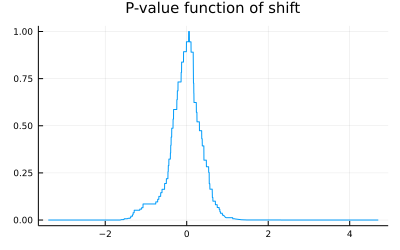

In [12]:
plot(a -> pvalue_brunner_munzel(X, Y .+ a), shiftmin, shiftmax;
    label="", title="P-value function of shift")

### よく使われているっぽいテストデータで正しく実装されているかを確認

https://okumuralab.org/~okumura/stat/brunner-munzel.html

```R
x = c(1,2,1,1,1,1,1,1,1,1,2,4,1,1)
y = c(3,3,4,3,1,2,3,1,1,5,4)
brunnermunzel.test(x, y)

data:  x and y
Brunner-Munzel Test Statistic = 3.1375, df = 17.683, p-value = 0.005786
95 percent confidence interval:
 0.5952169 0.9827052
sample estimates:
P(X<Y)+.5*P(X=Y) 
        0.788961 
```

(phat = 0.788961038961039,
 sehat = 0.09210009046816862,
 tvalue = 3.1374674823029505,
 df = 17.682841979481545,
 p = 0.5,
 pvalue = 0.005786208666151463,
 α = 0.05,
 confint_p = [0.5952168642537363, 0.9827052136683416],
 confint_shift = [-2.0000000000000004, -5.551115123125783e-17],
 shifthat = -1.9999999999999998)
median(X) = 1.0
median(Y) = 3.0


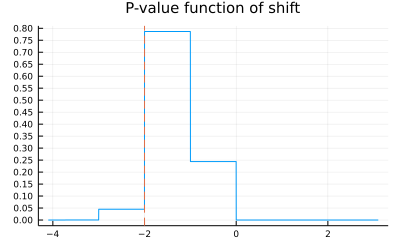

In [13]:
X = [1,2,1,1,1,1,1,1,1,1,2,4,1,1]
Y = [3,3,4,3,1,2,3,1,1,5,4]
show_plot_brunner_munzel(X, Y)

In [14]:
X = [1,2,1,1,1,1,1,1,1,1,2,4,1,1]
Y = [3,3,4,3,1,2,3,1,1,5,4]
@rput X Y
R"""
library(lawstat)
brunner.munzel.test(X, Y)
"""

RObject{VecSxp}

	Brunner-Munzel Test

data:  X and Y
Brunner-Munzel Test Statistic = 3.1375, df = 17.683, p-value = 0.005786
95 percent confidence interval:
 0.5952169 0.9827052
sample estimates:
P(X<Y)+.5*P(X=Y) 
        0.788961 



このように Brunner-Munzel 検定は R では [lawstat](https://cran.r-project.org/package=lawstat) パッケージの [brunner.munzel.test](https://rdrr.io/cran/lawstat/man/brunner.munzel.test.html) で使える.

### 組み合わせの生成子

In [15]:
"""
    complementcomb!(complcomb::AbstractVector, comb::AbstractVector)

`comb` が {1,2,…,N} から重複無しに m 個を選ぶ組み合わせを表す配列であり, `comb` の中で数は小さな順に並んでいるとし, `complcomb` は長さ N - m の配列であると仮定する.

このとき, この函数は配列 `complcomb` に配列 `comb` の補集合を格納し, `complcomb` を返す.

この函数はメモリ割り当てゼロで実行される.
"""
function complementcomb!(complcomb::AbstractVector, comb::AbstractVector)
    N = length(comb) + length(complcomb)
    k = 0
    a = 0
    @inbounds for b in comb
        for i in a+1:b-1
            k += 1
            complcomb[k] = i
        end
        a = b
    end
    @inbounds for i in a+1:N
        k +=1
        complcomb[k] = i
    end
    complcomb
end

"""
    complementcomb(N, comb::AbstractVector)

`comb` が {1,2,…,N} から重複無しに m 個を選ぶ組み合わせを表す配列であり, `comb` の中で数は小さな順に並んでいると仮定する.

この函数は `comb` の補集合の配列を返す.

この函数は返り値の配列の分だけのメモリ割り当てを行う.
"""
complementcomb(N, comb::AbstractVector) =
    complementcomb!(similar(comb, N - length(comb)), comb)

complementcomb

In [16]:
@doc complementcomb!

```
complementcomb!(complcomb::AbstractVector, comb::AbstractVector)
```

`comb` が {1,2,…,N} から重複無しに m 個を選ぶ組み合わせを表す配列であり, `comb` の中で数は小さな順に並んでいるとし, `complcomb` は長さ N - m の配列であると仮定する.

このとき, この函数は配列 `complcomb` に配列 `comb` の補集合を格納し, `complcomb` を返す.

この函数はメモリ割り当てゼロで実行される.


In [17]:
@doc complementcomb

```
complementcomb(N, comb::AbstractVector)
```

`comb` が {1,2,…,N} から重複無しに m 個を選ぶ組み合わせを表す配列であり, `comb` の中で数は小さな順に並んでいると仮定する.

この函数は `comb` の補集合の配列を返す.

この函数は返り値の配列の分だけのメモリ割り当てを行う.


In [18]:
N = 10
comb = [2, 4, 5, 8]
ccomb = similar(comb, N - length(comb))
@btime complementcomb!($ccomb, $comb);

  13.727 ns (0 allocations: 0 bytes)


In [19]:
N, m = 5, 3
ccomb = Vector{Int}(undef, N-m)
[(copy(comb), copy(complementcomb!(ccomb, comb))) for comb in mycombinations(1:N, m)]

10-element Vector{Tuple{Vector{Int64}, Vector{Int64}}}:
 ([1, 2, 3], [4, 5])
 ([1, 2, 4], [3, 5])
 ([1, 2, 5], [3, 4])
 ([1, 3, 4], [2, 5])
 ([1, 3, 5], [2, 4])
 ([1, 4, 5], [2, 3])
 ([2, 3, 4], [1, 5])
 ([2, 3, 5], [1, 4])
 ([2, 4, 5], [1, 3])
 ([3, 4, 5], [1, 2])

In [20]:
N, m = 5, 3
ccomb = Vector{Int}(undef, N-m)
[(copy(comb), complementcomb(N, comb)) for comb in mycombinations(1:N, m)]

10-element Vector{Tuple{Vector{Int64}, Vector{Int64}}}:
 ([1, 2, 3], [4, 5])
 ([1, 2, 4], [3, 5])
 ([1, 2, 5], [3, 4])
 ([1, 3, 4], [2, 5])
 ([1, 3, 5], [2, 4])
 ([1, 4, 5], [2, 3])
 ([2, 3, 4], [1, 5])
 ([2, 3, 5], [1, 4])
 ([2, 4, 5], [1, 3])
 ([3, 4, 5], [1, 2])

### Brunner-Munzel検定のpermutation版の実装

In [21]:
"""
    permutation_tvalues_brunner_munzel(X, Y,
        XandY = Vector{Float64}(undef, length(X)+length(Y)),
        Tval = Vector{Float64}(undef, binomial(length(X)+length(Y), length(X))),
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64)
    )

Brunner-Munzel検定のt値を `[X; Y]` から\
インデックスの重複無しに `length(X)` 個取る組み合わせと\
その補集合への分割のすべてについて計算して, `Tval` に格納して返す.
"""
function permutation_tvalues_brunner_munzel(X, Y,
        XandY = Vector{Float64}(undef, length(X)+length(Y)),
        Tval = Vector{Float64}(undef, binomial(length(X)+length(Y), length(X))),
        Hx = similar(X, Float64),
        Hy = similar(Y, Float64),
        ccomb = Vector{Int}(undef, length(Y))
    )
    m, n = length(X), length(Y)
    N = m + n
    @views XandY[1:m] .= X
    @views XandY[m+1:N] .= Y
    for (k, comb) in enumerate(mycombinations(1:N, m))
        complementcomb!(ccomb, comb)
        Tval[k] = statistics_brunner_munzel(
            view(XandY, comb), view(XandY, ccomb), Hx, Hy).tvalue
    end
    Tval
end

"""
    pvalue_brunner_munzel_perm(X, Y,
        Tval = permutation_tvalues_brunner_munzel(X, Y),
        tval = statistics_brunner_munzel(X, Y).tvalue;
        le = ⪅
    )

Brunner-Munzel検定のpermutation版のP値を返す.
"""
function pvalue_brunner_munzel_perm(X, Y,
        Tval = permutation_tvalues_brunner_munzel(X, Y),
        tval = statistics_brunner_munzel(X, Y).tvalue;
        le = ⪅
    )
    pvalue_perm = mean(T -> le(abs(tval), abs(T)), Tval)
end

pvalue_brunner_munzel_perm

In [22]:
@doc permutation_tvalues_brunner_munzel

```
permutation_tvalues_brunner_munzel(X, Y,
    XandY = Vector{Float64}(undef, length(X)+length(Y)),
    Tval = Vector{Float64}(undef, binomial(length(X)+length(Y), length(X))),
    Hx = similar(X, Float64),
    Hy = similar(Y, Float64)
)
```

Brunner-Munzel検定のt値を `[X; Y]` からインデックスの重複無しに `length(X)` 個取る組み合わせとその補集合への分割のすべてについて計算して, `Tval` に格納して返す.


In [23]:
@doc pvalue_brunner_munzel_perm

```
pvalue_brunner_munzel_perm(X, Y,
    Tval = permutation_tvalues_brunner_munzel(X, Y),
    tval = statistics_brunner_munzel(X, Y).tvalue;
    le = ⪅
)
```

Brunner-Munzel検定のpermutation版のP値を返す.


https://okumuralab.org/~okumura/stat/brunner-munzel.html

```
bm = brunner.munzel.test(x, y)$statistic
n1 = length(x)
n2 = length(y)
N = n1 + n2
xandy = c(x, y)
foo = function(X) {
  brunner.munzel.test(xandy[X], xandy[-X])$statistic
}
z = combn(1:N, n1, foo)
mean(abs(z) >= abs(bm))
```

>結果は 0.008037645 となりました。

X = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1]
Y = [3, 3, 4, 3, 1, 2, 3, 1, 1, 5, 4]
(m, n) = (length(X), length(Y)) = (14, 11)
  4.820885 seconds (904.65 k allocations: 80.359 MiB, 0.50% gc time, 5.46% compilation time)
pvalue_brunner_munzel_perm(X, Y, Tval) = 0.008037645264055279


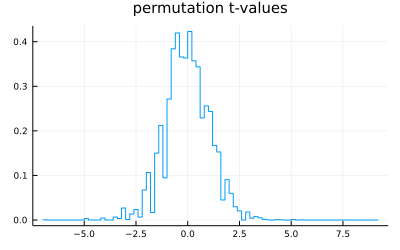

In [24]:
X = [1,2,1,1,1,1,1,1,1,1,2,4,1,1]
Y = [3,3,4,3,1,2,3,1,1,5,4]
@show X Y
@show m, n = length(X), length(Y)

Tval = @time permutation_tvalues_brunner_munzel(X, Y)
@show pvalue_brunner_munzel_perm(X, Y, Tval)
stephist(Tval; norm=true, bin=101, label="", title="permutation t-values")

### permutation版が正しく実装されているかの確認

* https://github.com/toshi-ara/brunnermunzel/issues/14
* https://github.com/toshi-ara/brunnermunzel/files/4395032/mwe.R.zip

__追記 2022-08-06:__ https://twitter.com/TA25140989/status/1555825941451923457 を参照せよ.

https://github.com/toshi-ara/brunnermunzel/tree/development の修正版の brunnermunzel パッケージをインストールし直した.  以下のセルの実行結果が変わるはずなので, その記録を残しておく.

以下の記録を見なくても,

* https://github.com/genkuroki/public/blob/e4faafc52721b63876b3b705f9450eade3c902f5/0034/Brunner-Munzel.ipynb

で閲覧できるが, わざわざ見に行くのも面倒なのでこのファイルにも記録を残しておく.

以前の実行結果:

```julia
@show pval_J - pval_J_le;
```
```
pval_J - pval_J_le = [0.0, 0.0, 0.007936507936507936, 0.023809523809523808, 0.023809523809523808, 0.0793650793650793, 0.0, 0.0, 0.007936507936507936, 0.0357142857142857, 0.0, 0.015873015873015928, 0.015873015873015872, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.023809523809523836, 0.015873015873015928, 0.011904761904761918, 0.0, 0.015873015873015928, 0.0, 0.003968253968253968, 0.0, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.015873015873015928, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.0, 0.007936507936507936, 0.007936507936507936, 0.011904761904761918, 0.007936507936507936, 0.03968253968253965, 0.0, 0.007936507936507936, 0.0, 0.05555555555555547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015872, 0.015873015873015872, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015928, 0.007936507936507964, 0.007936507936507964, 0.0, 0.003968253968253954, 0.0, 0.0, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0357142857142857, 0.015873015873015872, 0.0, 0.023809523809523725, 0.0, 0.023809523809523808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
```
```julia
idx = @show findall(pval_J .!= pval_J_le)
length(idx)
```
```
findall(pval_J .!= pval_J_le) = [3, 4, 5, 6, 9, 10, 12, 13, 15, 19, 21, 22, 23, 25, 27, 32, 34, 36, 40, 42, 44, 47, 48, 49, 50, 51, 53, 55, 68, 69, 71, 78, 79, 80, 82, 86, 89, 90, 92, 94]

40
```
```julia
@show pval_R - pval_J_le;
```
```
pval_R - pval_J_le = [0.0, 0.0, 0.007936507936507936, 0.023809523809523808, 0.023809523809523808, 0.0793650793650793, 0.0, 0.0, 0.007936507936507936, 0.0357142857142857, 0.0, 0.015873015873015928, 0.015873015873015872, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.023809523809523836, 0.007936507936507908, 0.011904761904761918, 0.0, 0.015873015873015928, 0.0, 0.003968253968253968, 0.0, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.00793650793650802, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.0, 0.007936507936507936, 0.007936507936507936, 0.011904761904761918, 0.007936507936507936, 0.03968253968253965, 0.0, 0.007936507936507936, 0.0, 0.05555555555555547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015872, 0.015873015873015872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007936507936507908, 0.007936507936507964, 0.007936507936507964, 0.0, 0.003968253968253954, 0.0, 0.0, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0357142857142857, 0.015873015873015872, 0.0, 0.023809523809523725, 0.0, 0.023809523809523808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
```
```julia
idx = @show findall(pval_R .!= pval_J_le)
length(idx)
```
```
findall(pval_R .!= pval_J_le) = [3, 4, 5, 6, 9, 10, 12, 13, 15, 19, 21, 22, 23, 25, 27, 32, 34, 36, 40, 42, 44, 47, 48, 49, 50, 51, 53, 55, 68, 69, 78, 79, 80, 82, 86, 89, 90, 92, 94]

39
```
```julia
@show pval_J - pval_R;
```
```
pval_J - pval_R = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00793650793650802, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007936507936507908, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00793650793650802, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
```
```julia
idx = @show findall(.!(pval_J .≈ pval_R))
length(idx)
```
```
findall(.!(pval_J .≈ pval_R)) = [22, 34, 71, 78]

4
```
```julia
all(pval_J .≥ pval_R .≥ pval_J_le)
```
```
true
```

以前のコメントは以下の通り:

```
なるほど！

https://github.com/toshi-ara/brunnermunzel/issues/14

に書いてあるように, 22, 34, 71 and 78 の4つで, 値が一致していない.

〇〇以下または〇〇以上の判定を $x \approx y$ のときも true にする必要があるのだが, その部分で違いが生じているものと思われる.

現時点では https://CRAN.R-project.org/package=brunnermunzel  にアクセスすると,

>Package ‘brunnermunzel’ was removed from the CRAN repository.
>
>Formerly available versions can be obtained from the [archive](https://cran.r-project.org/src/contrib/Archive/brunnermunzel/).
>
>Archived on 2022-03-04 as check problems were not corrected in time. , LENGTH_1 checks.
>
>A summary of the most recent check results can be obtained from the [check results archive](https://cran-archive.r-project.org/web/checks/2022/2022-03-04_check_results_brunnermunzel.html).
>
>Please use the canonical form https://CRAN.R-project.org/package=brunnermunzel to link to this page.

と表示される.
```

In [25]:
R"""
library(brunnermunzel)
set.seed(1290)
reps = 100
xx = c()
yy = c()
pval_R = numeric(reps)
for (i in seq_len(reps)){
  x = rnorm(5)
  y = rnorm(5)
  
  xx = c(xx, x)
  yy = c(yy, y)
  
  res_bm_perm <- brunnermunzel.permutation.test(x,y)
  pval_R[i] <- res_bm_perm$p.value
}
"""

@rget xx yy pval_R
XX = reshape(xx, 5, 100)
YY = reshape(yy, 5, 100)

pval_J = zeros(100)
pval_J_le = zeros(100)
for i in 1:100
    pval_J[i]    = pvalue_brunner_munzel_perm(XX[:,i], YY[:,i]; le = ⪅)
    pval_J_le[i] = pvalue_brunner_munzel_perm(XX[:,i], YY[:,i]; le = ≤)
end

In [26]:
@show pval_J - pval_J_le;

pval_J - pval_J_le = [0.0, 0.0, 0.007936507936507936, 0.023809523809523808, 0.023809523809523808, 0.0793650793650793, 0.0, 0.0, 0.007936507936507936, 0.0357142857142857, 0.0, 0.015873015873015928, 0.015873015873015872, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.023809523809523836, 0.015873015873015928, 0.011904761904761918, 0.0, 0.015873015873015928, 0.0, 0.003968253968253968, 0.0, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.015873015873015928, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.0, 0.007936507936507936, 0.007936507936507936, 0.011904761904761918, 0.007936507936507936, 0.03968253968253965, 0.0, 0.007936507936507936, 0.0, 0.05555555555555547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015872, 0.015873015873015872, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015928, 0.007936507936507964, 0.007936507936507964, 0.0, 0

In [27]:
idx = @show findall(pval_J .!= pval_J_le)
length(idx)

findall(pval_J .!= pval_J_le) = [3, 4, 5, 6, 9, 10, 12, 13, 15, 19, 21, 22, 23, 25, 27, 32, 34, 36, 40, 42, 44, 47, 48, 49, 50, 51, 53, 55, 68, 69, 71, 78, 79, 80, 82, 86, 89, 90, 92, 94]


40

In [28]:
@show pval_R - pval_J_le;

pval_R - pval_J_le = [0.0, 0.0, 0.007936507936507936, 0.023809523809523808, 0.023809523809523808, 0.0793650793650793, 0.0, 0.0, 0.007936507936507936, 0.0357142857142857, 0.0, 0.015873015873015928, 0.015873015873015872, 0.0, 0.015873015873015872, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.023809523809523836, 0.015873015873015928, 0.011904761904761918, 0.0, 0.015873015873015928, 0.0, 0.003968253968253968, 0.0, 0.0, 0.0, 0.0, 0.007936507936507936, 0.0, 0.015873015873015928, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.007936507936507908, 0.0, 0.0, 0.007936507936507936, 0.007936507936507936, 0.011904761904761918, 0.007936507936507936, 0.03968253968253965, 0.0, 0.007936507936507936, 0.0, 0.05555555555555547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015872, 0.015873015873015872, 0.0, 0.015873015873015928, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015873015873015928, 0.007936507936507964, 0.007936507936507964, 0.0, 0

In [29]:
idx = @show findall(pval_R .!= pval_J_le)
length(idx)

findall(pval_R .!= pval_J_le) = [3, 4, 5, 6, 9, 10, 12, 13, 15, 19, 21, 22, 23, 25, 27, 32, 34, 36, 40, 42, 44, 47, 48, 49, 50, 51, 53, 55, 68, 69, 71, 78, 79, 80, 82, 86, 89, 90, 92, 94]


40

In [30]:
@show pval_J - pval_R;

pval_J - pval_R = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [31]:
idx = @show findall(.!(pval_J .≈ pval_R))
length(idx)

findall(.!(pval_J .≈ pval_R)) = Int64[]


0

In [32]:
all(pval_J .≥ pval_R .≥ pval_J_le)

true

__2022-08-06:__ やった! 値が完全に一致した! permutation版Brunner-Munzel検定について,

* https://github.com/toshi-ara/brunnermunzel/tree/development

の実装と私による実装の計算結果は以上の場合において完全に一致している.

## 計算例

In [33]:
m, n = 10, 10
X, Y = rand(Normal(0, 1), m), rand(Normal(0, 2), n)
@show pval_brmu = pvalue_brunner_munzel(X, Y)
@show pval_perm = pvalue_brunner_munzel_perm(X, Y);

pval_brmu = pvalue_brunner_munzel(X, Y) = 0.18972278377606908
pval_perm = pvalue_brunner_munzel_perm(X, Y) = 0.1742730953257269


(phat = 0.75,
 sehat = 0.10056855914111178,
 tvalue = 2.485866379463735,
 df = 18.385702920172452,
 p = 0.5,
 pvalue = 0.022742714988590425,
 α = 0.05,
 confint_p = [0.5390305665719614, 0.9609694334280386],
 confint_shift = [-2.4770370893730127, -0.3717172074086195],
 shifthat = -1.4469029166494445)
median(X) = -0.5058729691113518
median(Y) = 1.1395412005826189


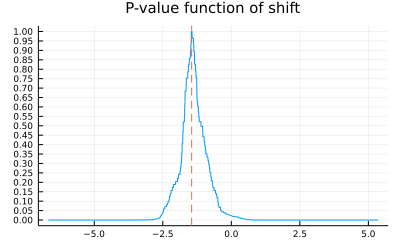

In [34]:
Random.seed!(4)

m, n = 10, 20
X, Y = rand(Normal(0, 1), m), rand(Normal(0, 2), n)
show_plot_brunner_munzel(X, Y)

(phat = 0.675,
 sehat = 0.1049296617650541,
 tvalue = 1.667783895004246,
 df = 27.705176944214784,
 p = 0.5,
 pvalue = 0.10662428006873317,
 α = 0.05,
 confint_p = [0.45995823964489857, 0.8900417603551015],
 confint_shift = [-2.2060635904773678, 0.3296238740154929],
 shifthat = -0.999368724114565)
median(X) = -0.17409123783026362
median(Y) = 0.8382134149102431


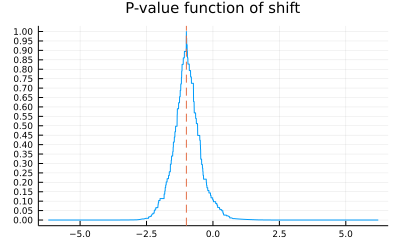

In [35]:
m, n = 10, 20
X, Y = rand(Normal(0, 1), m), rand(Normal(0, 2), n)
show_plot_brunner_munzel(X, Y)

(phat = 0.43979999999999997,
 sehat = 0.05714122667226539,
 tvalue = -1.0535300606211744,
 df = 60.575330843208235,
 p = 0.5,
 pvalue = 0.2962824213806768,
 α = 0.05,
 confint_p = [0.3255228528192483, 0.5540771471807516],
 confint_shift = [-0.3011419367780337, 1.0179208275627627],
 shifthat = 0.3967840840930079)
median(X) = -0.0536449473157313
median(Y) = -0.6163649344394873


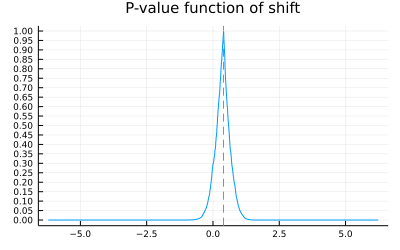

In [36]:
m, n = 100, 50
X, Y = rand(Normal(0, 1), m), rand(Normal(0, 2), n)
show_plot_brunner_munzel(X, Y)

(phat = 0.6725,
 sehat = 0.1005725567999867,
 tvalue = 1.715179622439735,
 df = 20.71835365424782,
 p = 0.5,
 pvalue = 0.10123190720539166,
 α = 0.05,
 confint_p = [0.46317465971191163, 0.8818253402880883],
 confint_shift = [-10.999999999999998, 0.9999999999999997],
 shifthat = -7.000000000000001)
median(X) = 6.5
median(Y) = 14.5


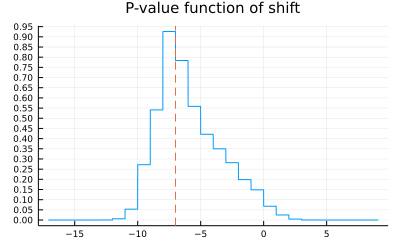

In [37]:
Random.seed!(4)

m, n = 10, 20
X, Y = rand(1:m, m), rand(1:n, n)
show_plot_brunner_munzel(X, Y)

(phat = 0.765,
 sehat = 0.08626255311649104,
 tvalue = 3.0720166564295583,
 df = 27.60349766038036,
 p = 0.5,
 pvalue = 0.004741546491682432,
 α = 0.05,
 confint_p = [0.5881847509519754, 0.9418152490480246],
 confint_shift = [-8.999999999999998, -1.9999999999999993],
 shifthat = -5.0)
median(X) = 5.5
median(Y) = 12.0


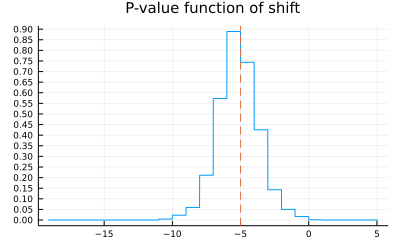

In [38]:
m, n = 10, 20
X, Y = rand(1:m, m), rand(1:n, n)
show_plot_brunner_munzel(X, Y)

(phat = 0.75,
 sehat = 0.11205157542647741,
 tvalue = 2.231115439907736,
 df = 18.0,
 p = 0.5,
 pvalue = 0.03863103202434314,
 α = 0.05,
 confint_p = [0.5145883755427825, 0.9854116244572175],
 confint_shift = [-5.318179432610124, -0.05841508479073754],
 shifthat = -1.4733410643825495)
median(X) = 1.3089930416807416
median(Y) = 2.9790059563220423


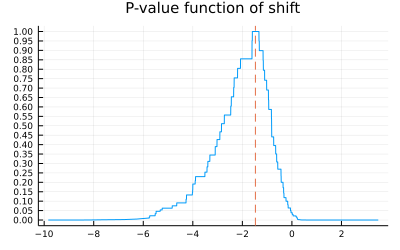

In [39]:
distx, disty = LogNormal(), LogNormal(1)
m, n = 10, 10
X, Y = rand(distx, m), rand(disty, n)
show_plot_brunner_munzel(X, Y)

(phat = 0.6912499999999999,
 sehat = 0.05960002903974512,
 tvalue = 3.208891053936604,
 df = 75.84080882915966,
 p = 0.5,
 pvalue = 0.001953574321225763,
 α = 0.05,
 confint_p = [0.5725422250913458, 0.8099577749086541],
 confint_shift = [-2.07997163873439, -0.29464656357396524],
 shifthat = -1.0768936945378669)
median(X) = 1.044779302249417
median(Y) = 2.2527593566191237


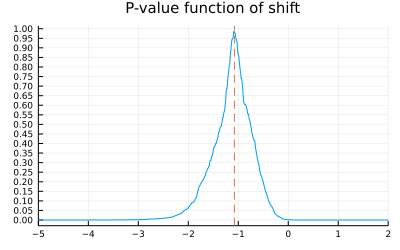

In [40]:
distx, disty = LogNormal(), LogNormal(1)
m, n = 40, 40
X, Y = rand(distx, m), rand(disty, n)
show_plot_brunner_munzel(X, Y; xlim=(-5, 2))

(phat = 0.79234375,
 sehat = 0.025077139980214335,
 tvalue = 11.657778767062629,
 df = 315.6587283148897,
 p = 0.5,
 pvalue = 2.3287816342563994e-26,
 α = 0.05,
 confint_p = [0.7430042840809774, 0.8416832159190226],
 confint_shift = [-2.250313266911184, -1.404197630202607],
 shifthat = -1.8203983580938916)
median(X) = 0.8417596982690712
median(Y) = 2.974128627007357


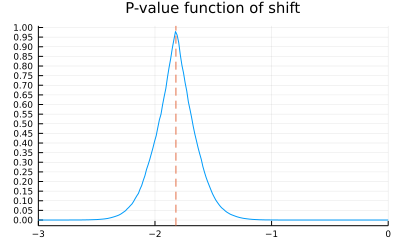

In [41]:
distx, disty = LogNormal(), LogNormal(1)
m, n = 160, 160
X, Y = rand(distx, m), rand(disty, n)
show_plot_brunner_munzel(X, Y; xlim=(-3, 0))

## Brunner-Munzel検定とWelchのt検定の比較

### 第一種の過誤の確率

In [42]:
function sim_brunner_mumzel(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10,
        L = 10^6)
    pval_bm = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    tmpHx = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpHy = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    @threads for i in 1:L
        X = rand!(distx, tmpX[threadid()])
        Y = rand!(disty, tmpY[threadid()])
        pval_bm[i] = pvalue_brunner_munzel(X, Y, tmpHx[threadid()], tmpHy[threadid()])
    end
    ecdf(pval_bm)
end

function sim_welch(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10,
        L = 10^6)
    pval_w = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    @threads for i in 1:L
        X = rand!(distx, tmpX[threadid()])
        Y = rand!(disty, tmpY[threadid()])
        pval_w[i] = pvalue_welch(X, Y)
    end
    ecdf(pval_w)
end

function printcompact(io, xs...)
    print(IOContext(io, :compact => true), xs...)
end

function distname(dist)
    replace(sprint(printcompact, dist), r"\{[^\}]*\}"=>"")
end

function plot_ecdf(ecdf_pval, distx, disty, m, n, a;
        testname = "", kwargs...)
    plot(p -> ecdf_pval(p), 0, 0.1; label="ecdf of P-values")
    plot!([0, 0.1], [0, 0.1]; label="", ls=:dot, c=:black)
    plot!(legend=:topleft)
    plot!(xtick=0:0.01:0.1, ytick=0:0.01:1)
    plot!(xguide="nominal significance level α", 
        yguide="probability of P-value < α")
    s = (a < 0 ? "" : "+") * string(round(a; digits=4))
    title!("$(testname)X: $(distname(distx)), m=$m\n\
        Y: $(distname(disty))$s, n=$n")
    plot!(size=(400, 450))
    plot!(; kwargs...)
end

function plot_pvals(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10,
        L = 10^6, a = nothing, Δμ = nothing, kwargs...)
    @show (mean(distx), std(distx))
    @show (mean(disty), std(disty))
    
    if isnothing(a)
        @show a = tieshift(distx, disty)
        @show prob_x_le_y(distx, disty + a)
    else
        @show a
        @show median(distx) - median(disty)
    end
    if isnothing(Δμ)
        @show Δμ = mean(distx) - mean(disty)
        @show mean(distx), mean(disty + Δμ)
    else
        @show Δμ
        @show mean(distx), mean(disty + Δμ)
    end
        
    ecdf_bm = @time sim_brunner_mumzel(;
        distx = distx,
        disty = disty + a,
        m, n, L, kwargs...)
    ecdf_w = @time sim_welch(;
        distx = distx,
        disty = disty + Δμ,
        m, n, L, kwargs...)
    ymax = max(ecdf_bm(0.1), ecdf_w(0.1))
    P1 = plot_ecdf(ecdf_bm, distx, disty, m, n, a;
        testname="Brunner-Munzel test\n",
        ylim=(-0.002, 1.02*ymax), kwargs...)
    P2 = plot_ecdf(ecdf_w, distx, disty, m, n, Δμ;
        testname="Welch t-test\n",
        ylim=(-0.002, 1.02*ymax), kwargs...)
    plot(P1, P2; size=(800, 450), topmargin=3.5Plots.mm)
end

plot_pvals (generic function with 1 method)

(mean(distx), std(distx)) = (0.0, 1.0)
(mean(disty), std(disty)) = (0.0, 1.0)
a = tieshift(distx, disty) = 0.0
prob_x_le_y(distx, disty + a) = 0.5
Δμ = mean(distx) - mean(disty) = 0.0
(mean(distx), mean(disty + Δμ)) = (0.0, 0.0)
  0.327782 seconds (55.66 k allocations: 25.861 MiB, 4.14% gc time, 16.23% compilation time)
  0.253240 seconds (61.38 k allocations: 26.204 MiB, 22.86% compilation time)


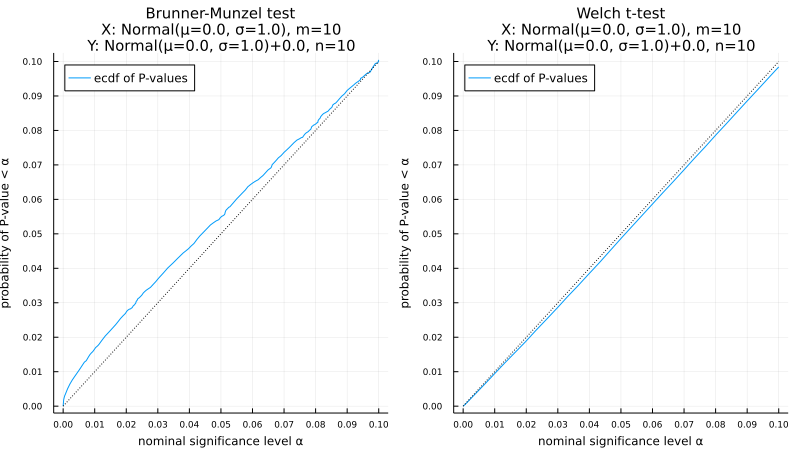

In [43]:
plot_pvals(; distx = Normal(0, 1), disty = Normal(0, 1), m = 10, n = 10)

(mean(distx), std(distx)) = (0.0, 1.0)
(mean(disty), std(disty)) = (0.0, 2.0)
a = tieshift(distx, disty) = 7.685641860444171e-14
prob_x_le_y(distx, disty + a) = 0.5
Δμ = mean(distx) - mean(disty) = 0.0
(mean(distx), mean(disty + Δμ)) = (0.0, 0.0)
  0.265909 seconds (233 allocations: 22.913 MiB)
  0.188669 seconds (99 allocations: 22.899 MiB, 7.19% gc time)


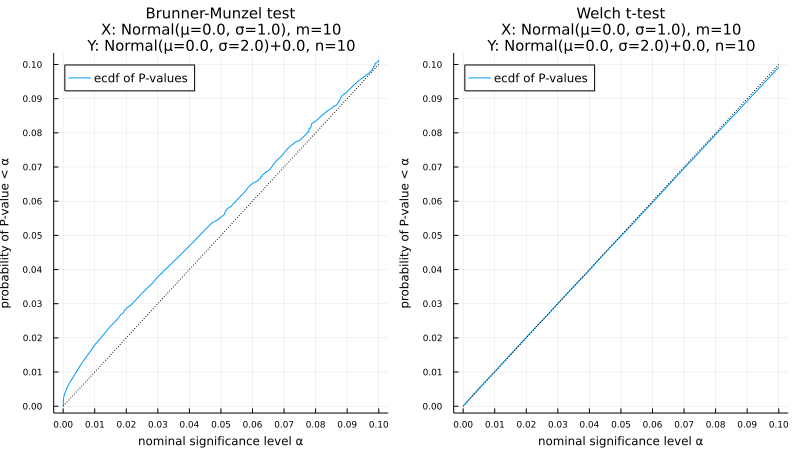

In [44]:
plot_pvals(; distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10)

(mean(distx), std(distx)) = (1.6487212707001282, 2.1611974158950877)
(mean(disty), std(disty)) = (4.4816890703380645, 5.874743663340262)
a = tieshift(distx, disty) = -1.4744426128871542
prob_x_le_y(distx, disty + a) = 0.5
Δμ = mean(distx) - mean(disty) = -2.8329677996379363
(mean(distx), mean(disty + Δμ)) = (1.6487212707001282, 1.6487212707001282)
  0.336978 seconds (39.11 k allocations: 24.957 MiB, 5.04% gc time, 10.55% compilation time)
  0.232974 seconds (22.04 k allocations: 24.034 MiB, 12.13% compilation time)


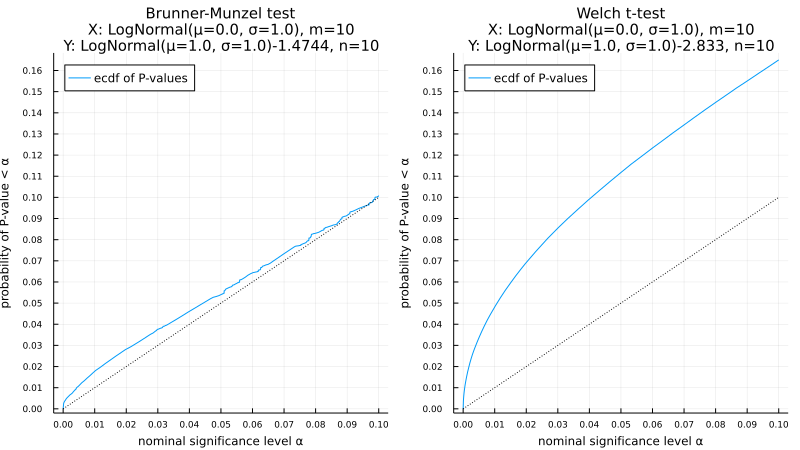

In [45]:
plot_pvals(; distx = LogNormal(), disty = LogNormal(1), m = 10, n = 10)

(mean(distx), std(distx)) = (1.6487212707001282, 2.1611974158950877)
(mean(disty), std(disty)) = (4.4816890703380645, 5.874743663340262)
a = tieshift(distx, disty) = -1.4744426128871542
prob_x_le_y(distx, disty + a) = 0.5
Δμ = mean(distx) - mean(disty) = -2.8329677996379363
(mean(distx), mean(disty + Δμ)) = (1.6487212707001282, 1.6487212707001282)
  0.463325 seconds (225 allocations: 22.916 MiB)
  0.254335 seconds (208 allocations: 22.910 MiB, 3.64% gc time)


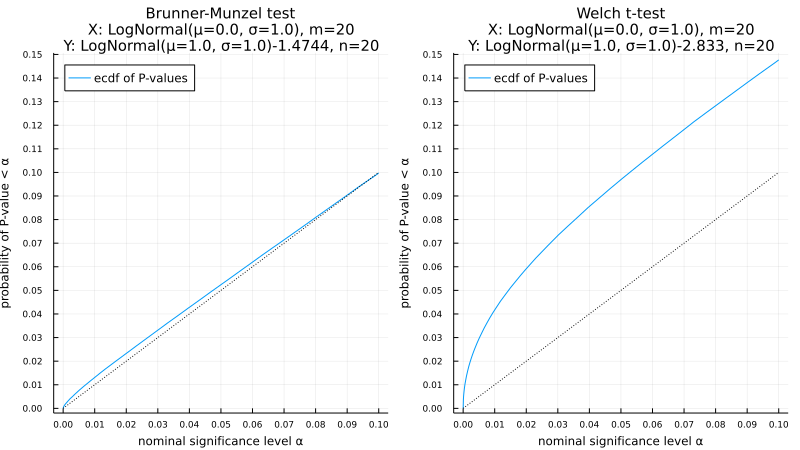

In [46]:
plot_pvals(; distx = LogNormal(), disty = LogNormal(1), m = 20, n = 20)

(mean(distx), std(distx)) = (1.6487212707001282, 2.1611974158950877)
(mean(disty), std(disty)) = (4.4816890703380645, 5.874743663340262)
a = tieshift(distx, disty) = -1.4744426128871542
prob_x_le_y(distx, disty + a) = 0.5
Δμ = mean(distx) - mean(disty) = -2.8329677996379363
(mean(distx), mean(disty + Δμ)) = (1.6487212707001282, 1.6487212707001282)
  0.821970 seconds (228 allocations: 22.925 MiB)
  0.349232 seconds (206 allocations: 22.914 MiB)


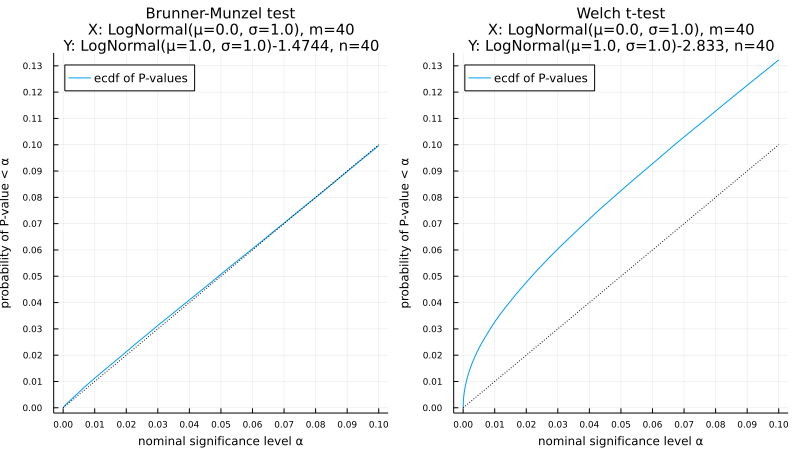

In [47]:
plot_pvals(; distx = LogNormal(), disty = LogNormal(1), m = 40, n = 40)

(mean(distx), std(distx)) = (0.0, Inf)
(mean(disty), std(disty)) = (0.0, Inf)
a = tieshift(distx, disty) = 0.0
prob_x_le_y(distx, disty + a) = 0.5000000000000001
Δμ = 0.0
(mean(distx), mean(disty + Δμ)) = (0.0, 0.0)
  0.508473 seconds (426.25 k allocations: 45.673 MiB, 36.21% compilation time)
  0.307722 seconds (22.04 k allocations: 24.034 MiB, 5.68% gc time, 10.40% compilation time)


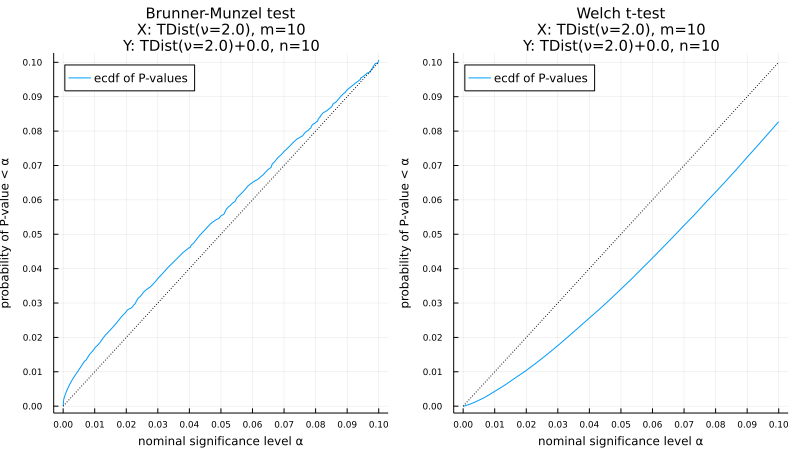

In [48]:
plot_pvals(; distx = TDist(2), disty = TDist(2), m = 10, n = 10, Δμ = 0.0)

(mean(distx), std(distx)) = (0.0, Inf)
(mean(disty), std(disty)) = (0.0, Inf)
a = tieshift(distx, disty) = -3.4064499775914207e-9
prob_x_le_y(distx, disty + a) = 0.5
Δμ = 0.0
(mean(distx), mean(disty + Δμ)) = (0.0, 0.0)
  0.406995 seconds (227 allocations: 22.913 MiB)
  0.387248 seconds (207 allocations: 22.908 MiB)


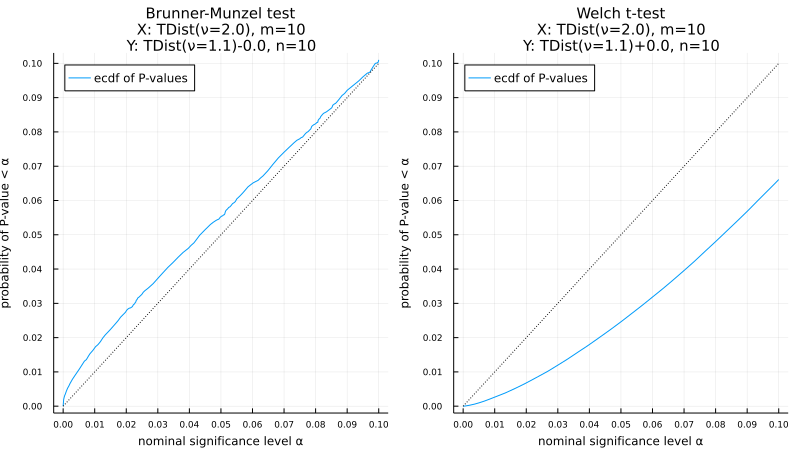

In [49]:
plot_pvals(; distx = TDist(2), disty = TDist(1.1), m = 10, n = 10, Δμ = 0.0)

### Brunner-Munzel検定は中央値に関する検定ではないことの証拠

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=1.0), 1.0)
a = tieshift(distx, disty) = -0.8414056600399943
  3.434486 seconds (472.42 k allocations: 48.296 MiB, 4.99% compilation time)
a = median(distx) - median(disty) = -0.6931471805599453
  3.213846 seconds (239 allocations: 22.946 MiB, 0.54% gc time)


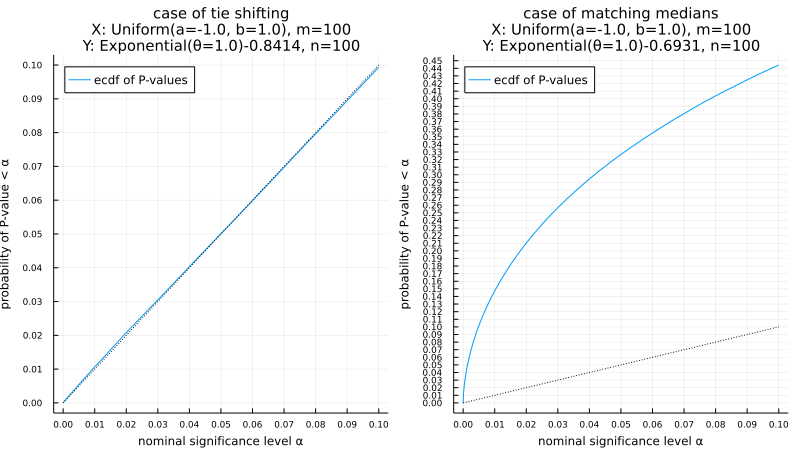

In [50]:
distx, disty = Uniform(-1, 1), Exponential()
m, n, = 100, 100

@show distx, std(distx)
@show disty, std(disty)

@show a = tieshift(distx, disty)
ecdf_pval1 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P1 = plot_ecdf(ecdf_pval1, distx, disty, m, n, a;
    testname="case of tie shifting\n")

@show a = median(distx) - median(disty)
ecdf_pval2 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P2 = plot_ecdf(ecdf_pval2, distx, disty, m, n, a;
    testname="case of matching medians\n")

plot(P1, P2; size=(800, 450), topmargin=4Plots.mm)

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=1.0), 1.0)
tieshift(distx, disty) = -0.8414056600399943
median(distx) - median(disty) = -0.6931471805599453


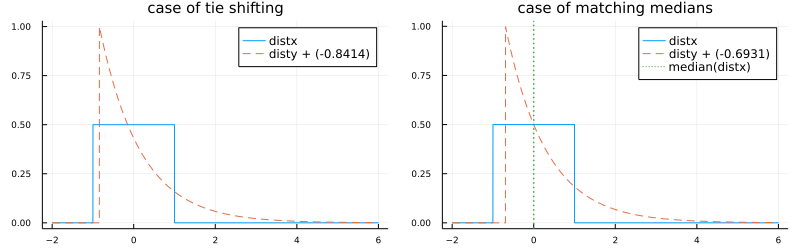

In [51]:
distx, disty = Uniform(-1, 1), Exponential()
@show distx, std(distx)
@show disty, std(disty)

a = @show tieshift(distx, disty)
P1 = plot(distx, -2, 6; label="distx")
plot!(disty + a, -2, 6; label="disty + ($(round(a; digits=4)))", ls=:dash)
title!("case of tie shifting")

a = @show median(distx) - median(disty)
P2 = plot(distx, -2, 6; label="distx")
plot!(disty + a, -2, 6; label="disty + ($(round(a; digits=4)))", ls=:dash)
vline!([median(distx)]; label="median(distx)", ls=:dot, lw=1.5)
title!("case of matching medians")

plot(P1, P2; size=(800, 250))

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=4.0), 4.0)
a = tieshift(distx, disty) = -2.814168911097315
  3.207957 seconds (234 allocations: 22.947 MiB)
a = median(distx) - median(disty) = -2.772588722239781
  3.218125 seconds (228 allocations: 22.946 MiB)


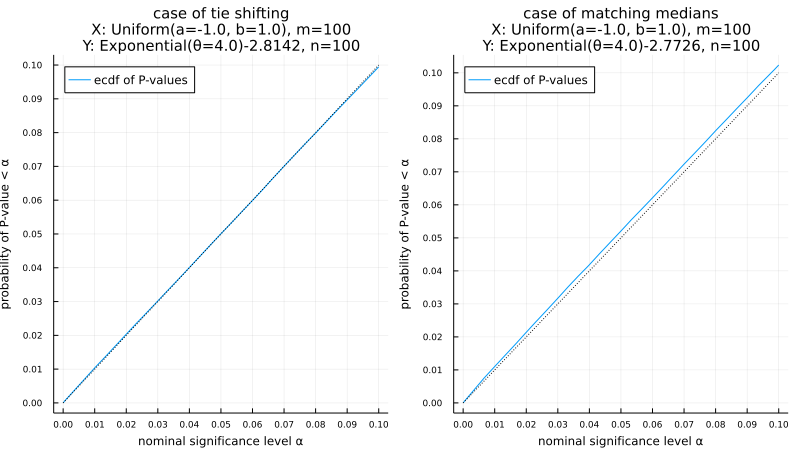

In [52]:
distx, disty = Uniform(-1, 1), Exponential(4)
m, n, = 100, 100

@show distx, std(distx)
@show disty, std(disty)

@show a = tieshift(distx, disty)
ecdf_pval1 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P1 = plot_ecdf(ecdf_pval1, distx, disty, m, n, a;
    testname="case of tie shifting\n")

@show a = median(distx) - median(disty)
ecdf_pval2 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P2 = plot_ecdf(ecdf_pval2, distx, disty, m, n, a;
    testname="case of matching medians\n")

plot(P1, P2; size=(800, 450), topmargin=4Plots.mm)

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=4.0), 4.0)
tieshift(distx, disty) = -2.814168911097315
median(distx) - median(disty) = -2.772588722239781


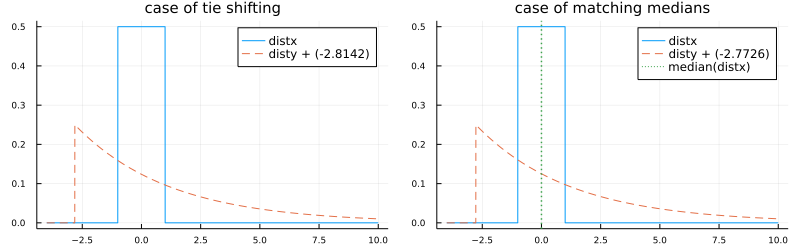

In [53]:
distx, disty = Uniform(-1, 1), Exponential(4)
@show distx, std(distx)
@show disty, std(disty)

a = @show tieshift(distx, disty)
P1 = plot(distx, -4, 10; label="distx")
plot!(disty + a, -4, 10; label="disty + ($(round(a; digits=4)))", ls=:dash)
title!("case of tie shifting")

a = @show median(distx) - median(disty)
P2 = plot(distx, -4, 10; label="distx")
plot!(disty + a, -4, 10; label="disty + ($(round(a; digits=4)))", ls=:dash)
vline!([median(distx)]; label="median(distx)", ls=:dot, lw=1.5)
title!("case of matching medians")

plot(P1, P2; size=(800, 250))

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=0.5773502691896257), 0.5773502691896257)
a = tieshift(distx, disty) = -0.5370568188698568
  3.272786 seconds (231 allocations: 22.947 MiB)
a = median(distx) - median(disty) = -0.40018871128431455
  3.275728 seconds (236 allocations: 22.946 MiB)


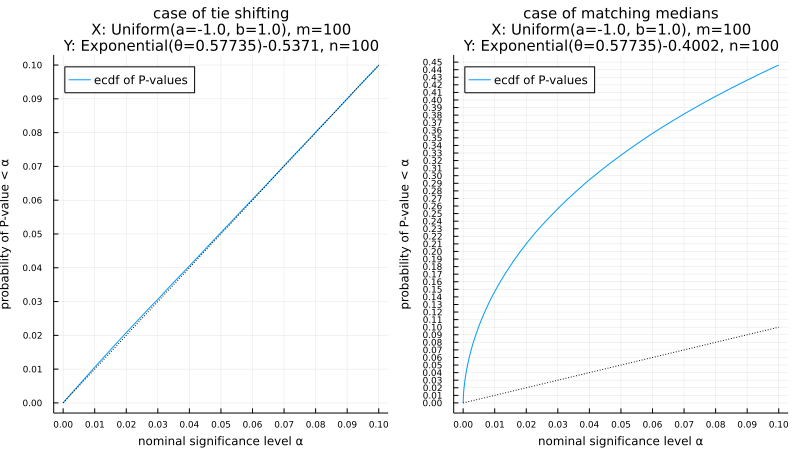

In [54]:
distx, disty = Uniform(-1, 1), Exponential(0.5773502691896257)
m, n, = 100, 100

@show distx, std(distx)
@show disty, std(disty)

@show a = tieshift(distx, disty)
ecdf_pval1 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P1 = plot_ecdf(ecdf_pval1, distx, disty, m, n, a;
    testname="case of tie shifting\n")

@show a = median(distx) - median(disty)
ecdf_pval2 = @time sim_brunner_mumzel(;
    distx = distx, disty = disty + a, m, n)
P2 = plot_ecdf(ecdf_pval2, distx, disty, m, n, a;
    testname="case of matching medians\n")

plot(P1, P2; size=(800, 450), topmargin=4Plots.mm)

(distx, std(distx)) = (Uniform{Float64}(a=-1.0, b=1.0), 0.5773502691896257)
(disty, std(disty)) = (Exponential{Float64}(θ=0.5773502691896257), 0.5773502691896257)
tieshift(distx, disty) = -0.5370568188698568
median(distx) - median(disty) = -0.40018871128431455


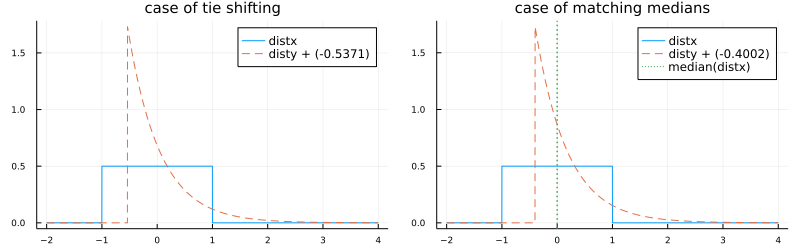

In [55]:
distx, disty = Uniform(-1, 1), Exponential(0.5773502691896257)
@show distx, std(distx)
@show disty, std(disty)

a = @show tieshift(distx, disty)
P1 = plot(distx, -2, 4; label="distx")
plot!(disty + a, -2, 4; label="disty + ($(round(a; digits=4)))", ls=:dash)
title!("case of tie shifting")

a = @show median(distx) - median(disty)
P2 = plot(distx, -2, 4; label="distx")
plot!(disty + a, -2, 4; label="disty + ($(round(a; digits=4)))", ls=:dash)
vline!([median(distx)]; label="median(distx)", ls=:dot, lw=1.5)
title!("case of matching medians")

plot(P1, P2; size=(800, 250))

### BM検定による互角シフトの信頼区間とWelchのt検定による平均の差の信頼区間の比較

In [56]:
function plot_confints(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10,
        L = 100, kwargs...)
    a = tieshift(distx, disty)
    Δμ = mean(distx) - mean(disty)
    BM = fill(zeros(2), 0)
    W = fill(zeros(2), 0)
    for _ in 1:L
        X = rand(distx, m)
        Y = rand(disty, n)
        push!(BM, brunner_munzel(X, Y .+ a).confint_shift)
        push!(W, confint_welch(X, Y .+ Δμ))
    end
    P = plot()
    for i in 1:L
        plot!(fill(i, 2), [first(BM[i]), last(BM[i])]; label="", c=1, lw=2)
        plot!(fill(i+0.3, 2), [first(W[i]), last(W[i])]; label="", c=2, lw=2)
    end
    title!("X: $(distname(distx)), m=$m,   Y: $(distname(disty)), n=$n")
    plot!(size=(1000, 250))
end

plot_confints (generic function with 1 method)

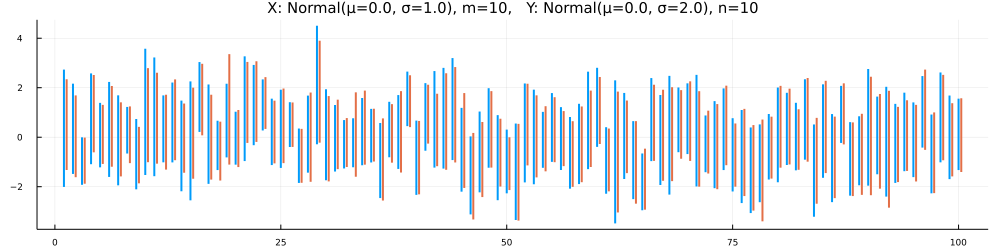

In [57]:
plot_confints(distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10)

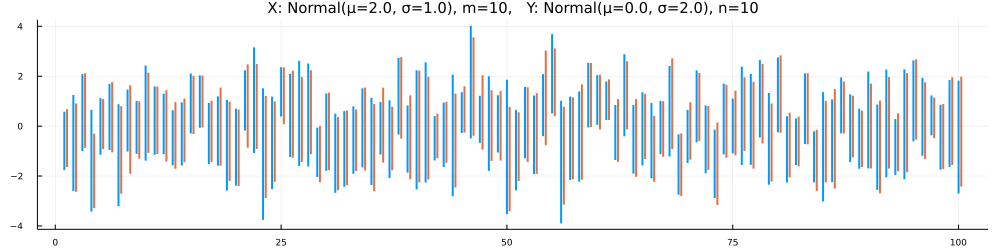

In [58]:
plot_confints(distx = Normal(2, 1), disty = Normal(0, 2), m = 10, n = 10)

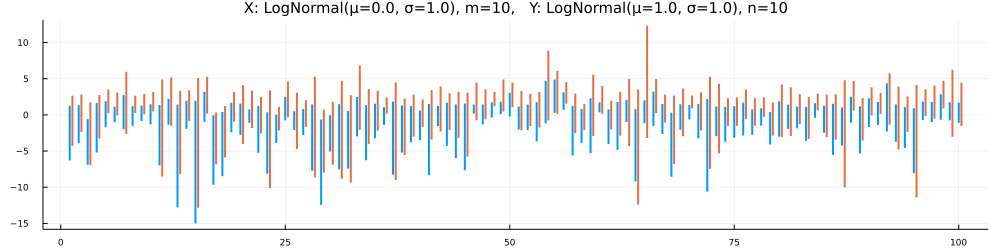

In [59]:
plot_confints(distx = LogNormal(0), disty = LogNormal(1), m = 10, n = 10)

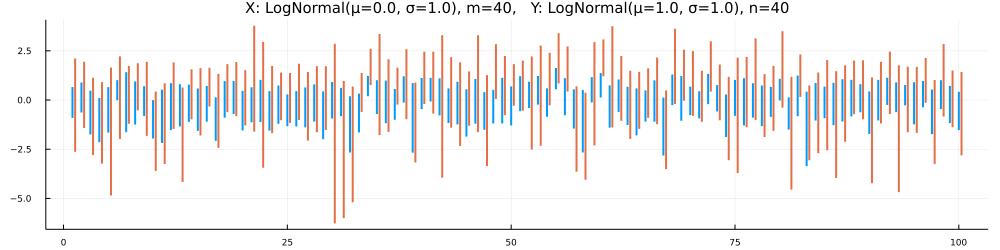

In [60]:
plot_confints(distx = LogNormal(0), disty = LogNormal(1), m = 40, n = 40)

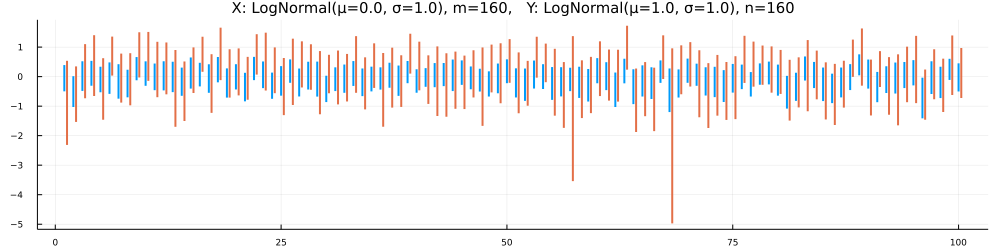

In [61]:
plot_confints(distx = LogNormal(0), disty = LogNormal(1), m = 160, n = 160)

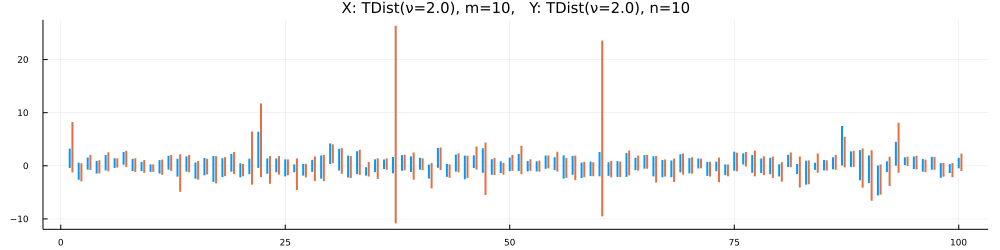

In [62]:
plot_confints(distx = TDist(2), disty = TDist(2), m = 10, n = 10)

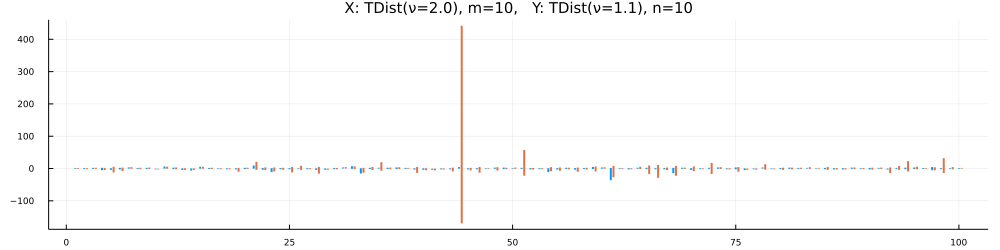

In [63]:
plot_confints(distx = TDist(2), disty = TDist(1.1), m = 10, n = 10)

In [64]:
function plot_limits(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10,
        L = 1000, kwargs...)
    
    @show distx, m
    @show disty, n

    a = tieshift(distx, disty)
    Δμ = mean(distx) - mean(disty)

    BM = fill(zeros(2), 0)
    W = fill(zeros(2), 0)
    for _ in 1:L
        X = rand(distx, m)
        Y = rand(disty, n)
        push!(BM, brunner_munzel(X, Y .+ a).confint_shift)
        push!(W, confint_welch(X, Y .+ Δμ))
    end

    lower = [(first(BM[i]), first(W[i])) for i in 1:L]
    upper = [(last(BM[i]), last(W[i])) for i in 1:L]

    P1 = scatter(lower; label="", msc=:auto, ms=2, ma=0.5)
    plot!(identity; label="")
    plot!(xguide="Brunner-Munzel", yguide="Welch")
    title!("lower")

    P2 = scatter(upper; label="", msc=:auto, ms=2, ma=0.5)
    plot!(identity; label="")
    plot!(xguide="Brunner-Munzel", yguide="Welch")
    title!("upper")

    plot(P1, P2; size=(640, 320))
end

plot_limits (generic function with 1 method)

(distx, m) = (Normal{Float64}(μ=0.0, σ=1.0), 10)
(disty, n) = (Normal{Float64}(μ=0.0, σ=2.0), 10)


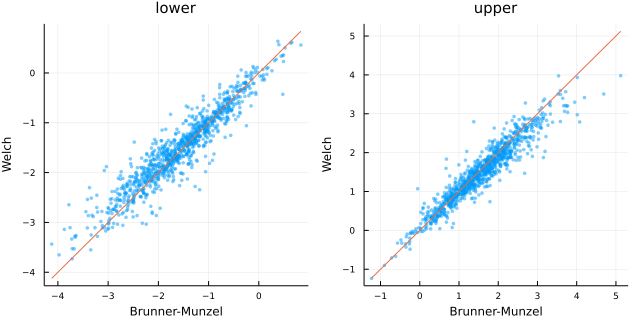

In [65]:
plot_limits(distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10)

(distx, m) = (Normal{Float64}(μ=2.0, σ=1.0), 10)
(disty, n) = (Normal{Float64}(μ=0.0, σ=2.0), 10)


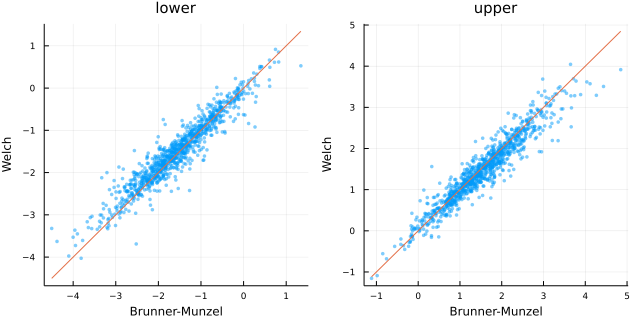

In [66]:
plot_limits(distx = Normal(2, 1), disty = Normal(0, 2), m = 10, n = 10)

(distx, m) = (LogNormal{Float64}(μ=0.0, σ=1.0), 10)
(disty, n) = (LogNormal{Float64}(μ=1.0, σ=1.0), 10)


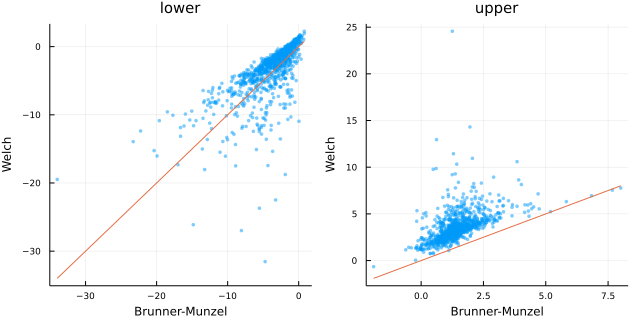

In [67]:
plot_limits(distx = LogNormal(), disty = LogNormal(1), m = 10, n = 10)

(distx, m) = (LogNormal{Float64}(μ=0.0, σ=1.0), 40)
(disty, n) = (LogNormal{Float64}(μ=1.0, σ=1.0), 40)


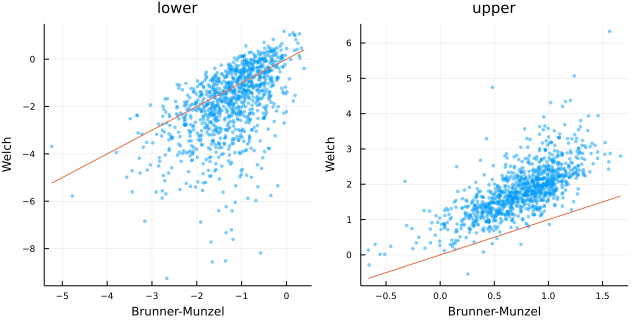

In [68]:
plot_limits(distx = LogNormal(), disty = LogNormal(1), m = 40, n = 40)

(distx, m) = (LogNormal{Float64}(μ=0.0, σ=1.0), 160)
(disty, n) = (LogNormal{Float64}(μ=1.0, σ=1.0), 160)
  6.793918 seconds (61.67 k allocations: 38.622 MiB)


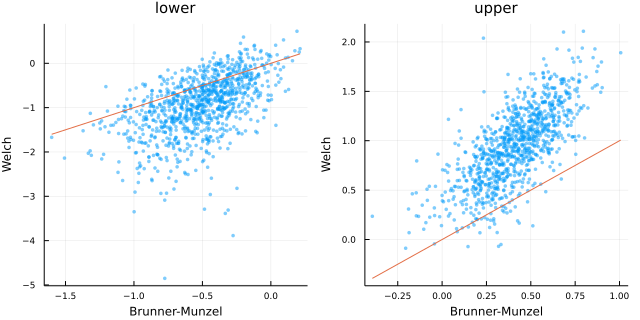

In [69]:
@time plot_limits(distx = LogNormal(), disty = LogNormal(1), m = 160, n = 160)

(distx, m) = (TDist{Float64}(ν=2.0), 10)
(disty, n) = (TDist{Float64}(ν=2.0), 10)


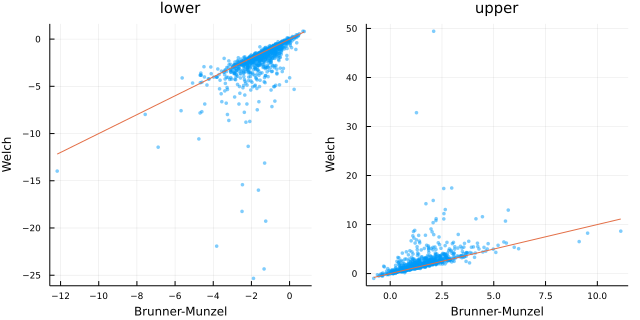

In [70]:
plot_limits(distx = TDist(2), disty = TDist(2), m = 10, n = 10)

(distx, m) = (TDist{Float64}(ν=2.0), 10)
(disty, n) = (TDist{Float64}(ν=1.1), 10)


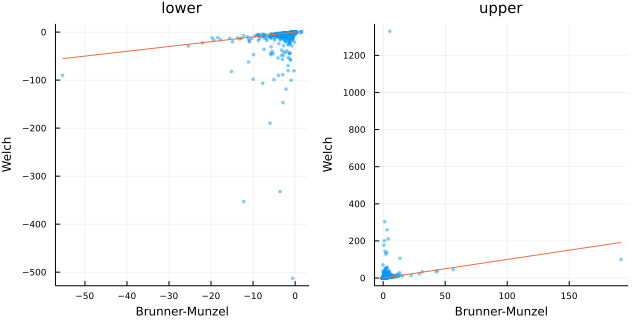

In [71]:
plot_limits(distx = TDist(2), disty = TDist(1.1), m = 10, n = 10)

## 小サンプルでのpermutation版の検定とBM検定とWelchのt検定の比較

In [72]:
function sim_brunner_mumzel_perm(;
        distx = Normal(0, 1), disty = Normal(0, 2), m = 5, n = 5,
        L = 10^2)
    pval_bm_perm = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    tmpXandY = [Vector{Float64}(undef, m+n) for _ in 1:nthreads()]
    tmpTval = [Vector{Float64}(undef, binomial(m+n, m)) for _ in 1:nthreads()]
    tmpHx = [Vector{Float64}(undef, m) for _ in 1:nthreads()]
    tmpHy = [Vector{Float64}(undef, n) for _ in 1:nthreads()]
    tmpccomb = [Vector{Int}(undef, n) for _ in 1:nthreads()]
    @threads for i in 1:L
        tid = threadid()
        X = rand!(distx, tmpX[tid])
        Y = rand!(disty, tmpY[tid])
        Tval = permutation_tvalues_brunner_munzel(X, Y,
            tmpXandY[tid], tmpTval[tid], tmpHx[tid], tmpHy[tid], tmpccomb[tid])
        tval = statistics_brunner_munzel(X, Y, tmpHx[tid], tmpHy[tid]).tvalue
        pval_bm_perm[i] = pvalue_brunner_munzel_perm(X, Y, Tval, tval)
    end
    ecdf(pval_bm_perm)
end

sim_brunner_mumzel_perm (generic function with 1 method)

In [73]:
@time ecdf_bm_perm = sim_brunner_mumzel_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 7, n = 7, L = 10^4)

  3.799263 seconds (35.80 k allocations: 2.941 MiB, 1.10% compilation time)


ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}([0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828, 0.0005827505827505828  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Float64[])

In [74]:
function plot_pvals_with_perm(;
        distx = Normal(0, 1),
        disty = Normal(0, 2),
        m = 7,
        n = 7,
        L = 10^4,
        kwargs...
    )
    a = tieshift(distx, disty)
    @time ecdf_bm_perm = sim_brunner_mumzel_perm(; distx, disty = disty + a, m, n, L)
    @time ecdf_bm = sim_brunner_mumzel(; distx, disty = disty + a, m, n, L)
    Δμ = mean(distx) - mean(disty)
    @time ecdf_w = sim_welch(; distx, disty = disty + Δμ, m, n, L)
    @show a Δμ

    plot(legend=:topleft)
    plot!(α -> ecdf_bm_perm(α), 0, 0.1; label="BM permutation")
    plot!(α -> ecdf_bm(α), 0, 0.1; label="Brunner-Munzel", ls=:dash)
    plot!(α -> ecdf_w(α), 0, 0.1; label="Welch", ls=:dashdot)
    plot!(identity; label="", c=:black, ls=:dot)
    plot!(xtick=0:0.01:0.1, ytick=0:0.01:1)
    plot!(xguide="nominal significance level α", 
        yguide="probability of P-value < α")
    a_ = string(round(a; digits=4))
    Δμ_ = string(round(Δμ; digits=4))
    title!("X: $(distname(distx)), m=$m\n\
        Y: $(distname(disty))+(a, Δμ), n=$n\n\
        a=$a_, Δμ=$Δμ_")
    plot!(size=(400, 450), titlefontsize=9)
    plot!(; kwargs...)
end

plot_pvals_with_perm (generic function with 1 method)

  0.229530 seconds (10.17 k allocations: 1.185 MiB)
  0.017653 seconds (131 allocations: 247.422 KiB)
  0.004728 seconds (106 allocations: 244.734 KiB)
a = 7.685641860444171e-14
Δμ = 0.0


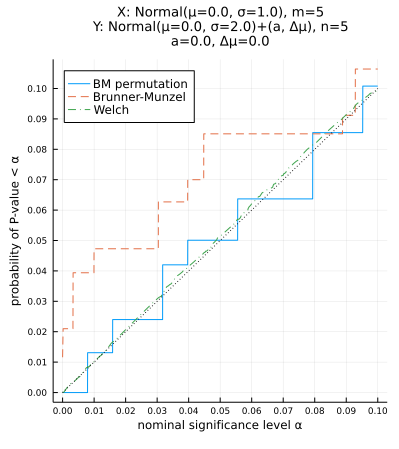

In [75]:
plot_pvals_with_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 5, n = 5, L = 10^4)

  3.807640 seconds (10.19 k allocations: 1.629 MiB)
  0.005800 seconds (125 allocations: 247.859 KiB)
  0.027359 seconds (104 allocations: 245.047 KiB)
a = 7.685641860444171e-14
Δμ = 0.0


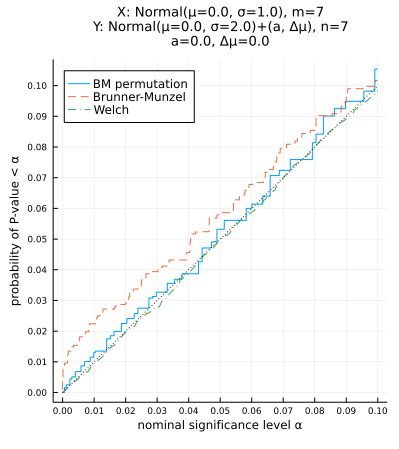

In [76]:
plot_pvals_with_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 7, n = 7, L = 10^4)

  3.348652 seconds (10.18 k allocations: 1.438 MiB)
  0.001652 seconds (133 allocations: 248.609 KiB)
  0.004396 seconds (104 allocations: 245.234 KiB)
a = 7.685641860444171e-14
Δμ = 0.0


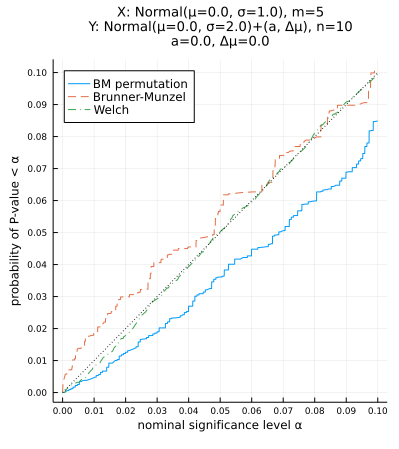

In [77]:
plot_pvals_with_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 5, n = 10, L = 10^4)

  3.429233 seconds (10.18 k allocations: 1.895 MiB)
  0.018557 seconds (125 allocations: 248.438 KiB)
  0.004641 seconds (99 allocations: 245.125 KiB)
a = 7.685641860444171e-14
Δμ = 0.0


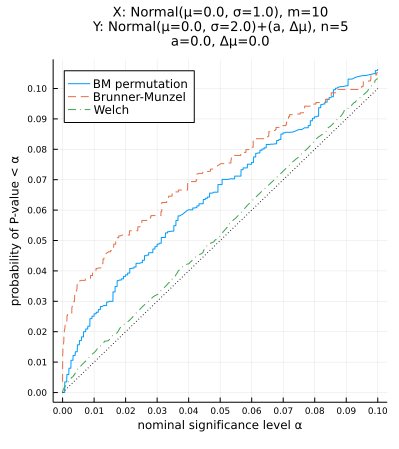

In [78]:
plot_pvals_with_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 5, L = 10^4)

 53.438533 seconds (2.23 k allocations: 17.257 MiB, 0.03% gc time)
  0.000561 seconds (130 allocations: 62.625 KiB)
  0.025479 seconds (101 allocations: 58.531 KiB)
a = 7.685641860444171e-14
Δμ = 0.0


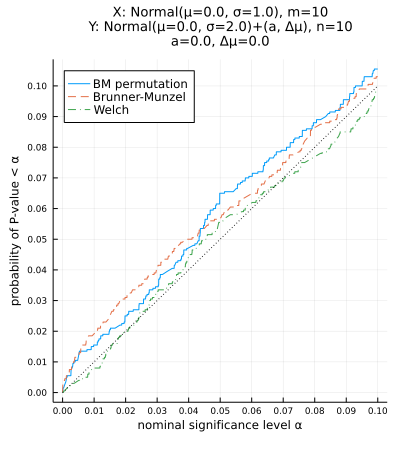

In [79]:
plot_pvals_with_perm(
    distx = Normal(0, 1), disty = Normal(0, 2), m = 10, n = 10, L = 2000)

  0.293526 seconds (41.28 k allocations: 2.806 MiB, 15.89% compilation time)
  0.029709 seconds (20.94 k allocations: 1.318 MiB, 94.94% compilation time)
  0.041234 seconds (18.79 k allocations: 1.204 MiB, 57.05% compilation time)
a = -0.5753641445892759
Δμ = -1.0


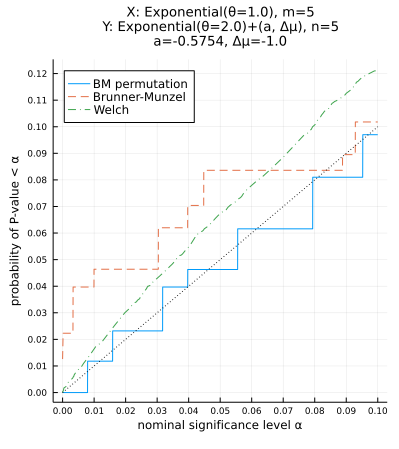

In [80]:
plot_pvals_with_perm(
    distx = Exponential(1), disty = Exponential(2),
    m = 5, n = 5, L = 10^4)

  3.948691 seconds (10.18 k allocations: 1.629 MiB)
  0.004954 seconds (125 allocations: 247.859 KiB)
  0.017548 seconds (104 allocations: 245.047 KiB)
a = -0.5753641445892759
Δμ = -1.0


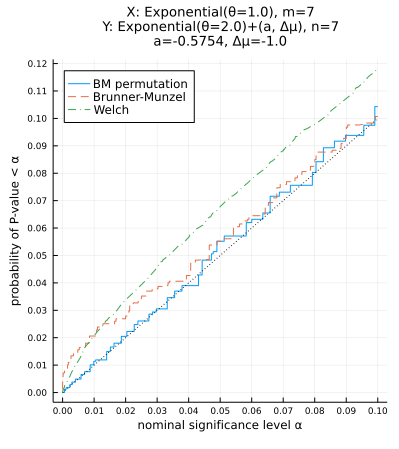

In [81]:
plot_pvals_with_perm(
    distx = Exponential(1), disty = Exponential(2),
    m = 7, n = 7, L = 10^4)

  3.462247 seconds (10.18 k allocations: 1.438 MiB)
  0.001549 seconds (124 allocations: 248.203 KiB)
  0.001251 seconds (107 allocations: 245.328 KiB)
a = -0.5753641445892759
Δμ = -1.0


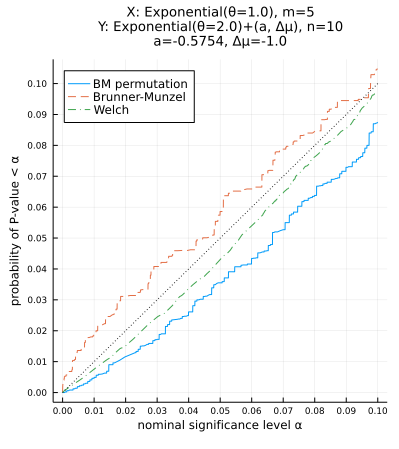

In [82]:
plot_pvals_with_perm(
    distx = Exponential(1), disty = Exponential(2),
    m = 5, n = 10, L = 10^4)

  3.563473 seconds (10.18 k allocations: 1.895 MiB)
  0.022323 seconds (132 allocations: 248.844 KiB)
  0.014712 seconds (104 allocations: 245.234 KiB)
a = -0.5753641445892759
Δμ = -1.0


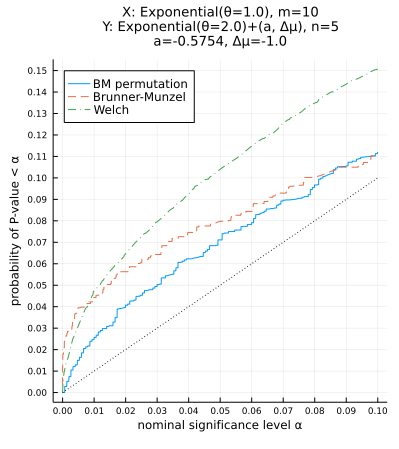

In [83]:
plot_pvals_with_perm(
    distx = Exponential(1), disty = Exponential(2),
    m = 10, n = 5, L = 10^4)

 53.972017 seconds (2.24 k allocations: 17.257 MiB)
  0.000422 seconds (131 allocations: 62.500 KiB)
  0.000441 seconds (98 allocations: 58.484 KiB)
a = -0.5753641445892759
Δμ = -1.0


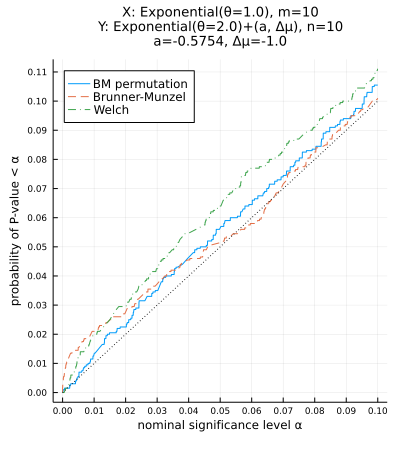

In [84]:
plot_pvals_with_perm(
    distx = Exponential(1), disty = Exponential(2),
    m = 10, n = 10, L = 2000)

  0.277728 seconds (32.46 k allocations: 2.343 MiB, 13.42% compilation time)
  0.001420 seconds (125 allocations: 247.125 KiB)
  0.024834 seconds (18.79 k allocations: 1.204 MiB, 95.25% compilation time)
a = -0.5370568188698568
Δμ = -0.5773502691896257


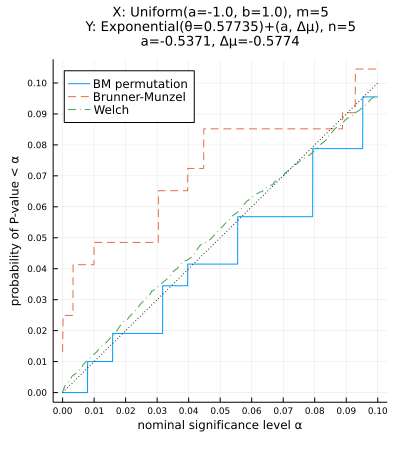

In [85]:
plot_pvals_with_perm(
    distx = Uniform(-1, 1), disty = Exponential(0.5773502691896257),
    m = 5, n = 5, L = 10^4)

  3.938512 seconds (10.18 k allocations: 1.629 MiB)
  0.001489 seconds (125 allocations: 248.078 KiB)
  0.004222 seconds (97 allocations: 244.891 KiB)
a = -0.5370568188698568
Δμ = -0.5773502691896257


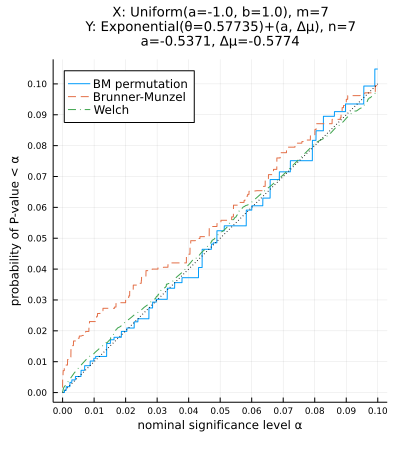

In [86]:
plot_pvals_with_perm(
    distx = Uniform(-1, 1), disty = Exponential(0.5773502691896257),
    m = 7, n = 7, L = 10^4)

  3.505088 seconds (10.19 k allocations: 1.438 MiB)
  0.017648 seconds (131 allocations: 248.562 KiB)
  0.014763 seconds (104 allocations: 245.250 KiB)
a = -0.5370568188698568
Δμ = -0.5773502691896257


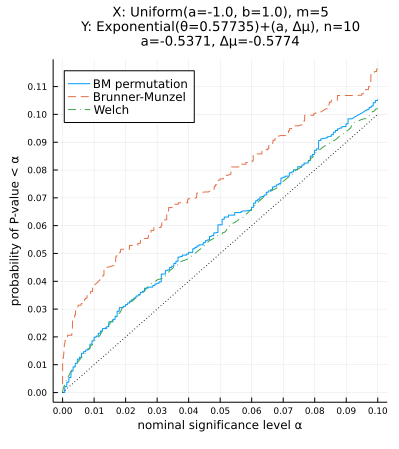

In [87]:
plot_pvals_with_perm(
    distx = Uniform(-1, 1), disty = Exponential(0.5773502691896257),
    m = 5, n = 10, L = 10^4)

  3.527738 seconds (10.18 k allocations: 1.895 MiB)
  0.023244 seconds (127 allocations: 248.484 KiB)
  0.032098 seconds (99 allocations: 245.344 KiB)
a = -0.5370568188698568
Δμ = -0.5773502691896257


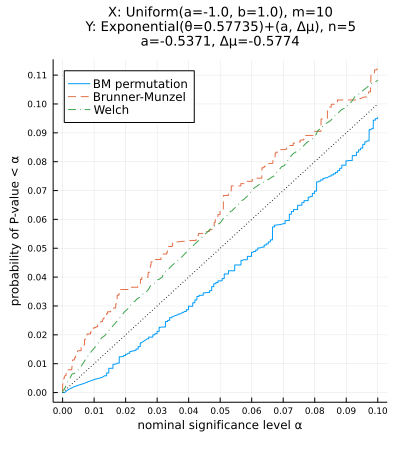

In [88]:
plot_pvals_with_perm(
    distx = Uniform(-1, 1), disty = Exponential(0.5773502691896257),
    m = 10, n = 5, L = 10^4)

 53.395587 seconds (2.22 k allocations: 17.257 MiB)
  0.016941 seconds (130 allocations: 62.453 KiB)
  0.014504 seconds (102 allocations: 58.750 KiB)
a = -0.5370568188698568
Δμ = -0.5773502691896257


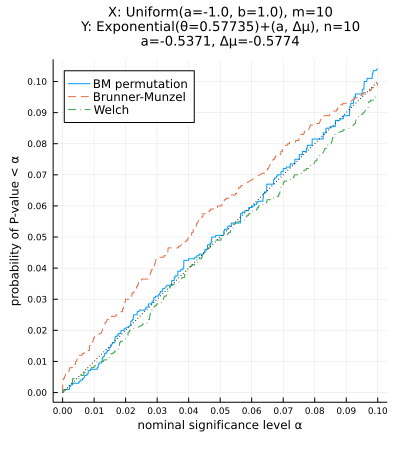

In [89]:
plot_pvals_with_perm(
    distx = Uniform(-1, 1), disty = Exponential(0.5773502691896257),
    m = 10, n = 10, L = 2000)

  0.306429 seconds (35.60 k allocations: 2.486 MiB, 14.79% compilation time)
  0.001561 seconds (127 allocations: 247.188 KiB)
  0.017950 seconds (104 allocations: 244.688 KiB)
a = -1.4744426128871542
Δμ = -2.8329677996379363


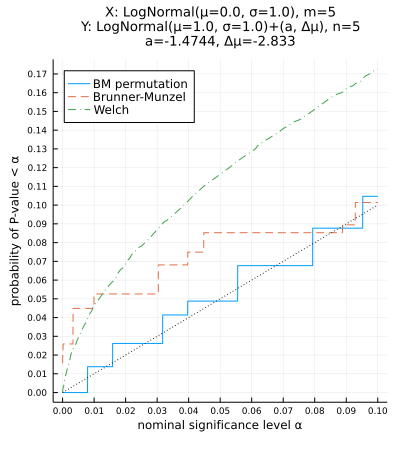

In [90]:
plot_pvals_with_perm(
    distx = LogNormal(), disty = LogNormal(1), m = 5, n = 5, L = 10^4)

  3.434650 seconds (10.18 k allocations: 1.438 MiB)
  0.024491 seconds (131 allocations: 248.484 KiB)
  0.015069 seconds (104 allocations: 245.250 KiB)
a = -1.4744426128871542
Δμ = -2.8329677996379363


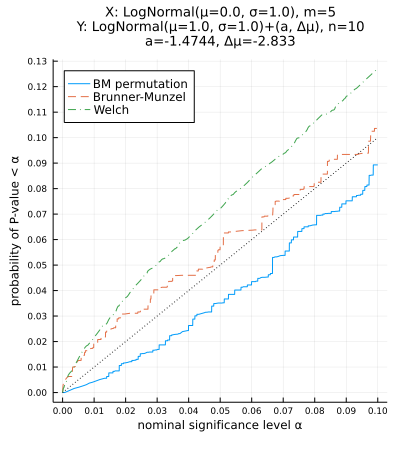

In [91]:
plot_pvals_with_perm(
    distx = LogNormal(), disty = LogNormal(1), m = 5, n = 10, L = 10^4)

  3.576869 seconds (10.18 k allocations: 1.895 MiB)
  0.018933 seconds (125 allocations: 248.281 KiB)
  0.005340 seconds (107 allocations: 245.781 KiB)
a = -1.4744426128871542
Δμ = -2.8329677996379363


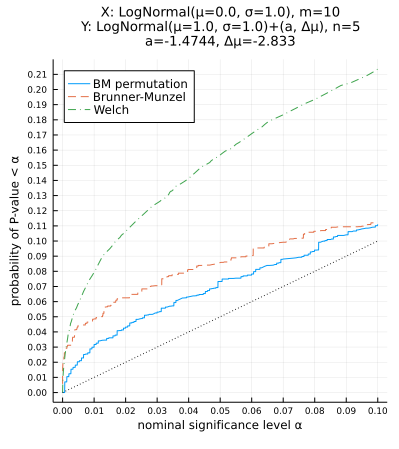

In [92]:
plot_pvals_with_perm(
    distx = LogNormal(), disty = LogNormal(1), m = 10, n = 5, L = 10^4)

 54.768207 seconds (2.23 k allocations: 17.257 MiB)
  0.000670 seconds (226 allocations: 70.969 KiB)
  0.000532 seconds (97 allocations: 58.469 KiB)
a = -1.4744426128871542
Δμ = -2.8329677996379363


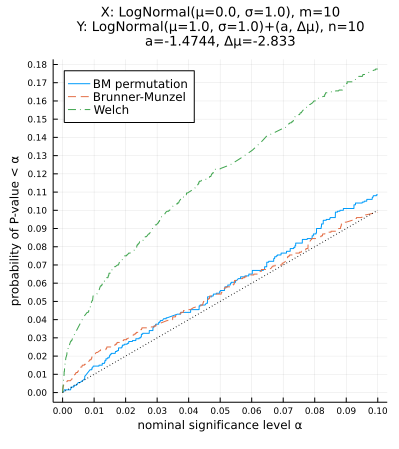

In [93]:
plot_pvals_with_perm(
    distx = LogNormal(0), disty = LogNormal(1), m = 10, n = 10, L = 2000)